<a href="https://colab.research.google.com/github/ahmedebeed555/visualization/blob/main/27JUL_completePlotGuide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complete Guide to Data Visualization with Matplotlib and Seaborn

## A Comprehensive Tutorial with Real Dataset Examples

This notebook provides an exhaustive guide to data visualization using Python's most popular plotting libraries: **Matplotlib** and **Seaborn**. We'll explore every major visualization type, customization option, and best practice using real datasets.

### What You'll Learn:
- **Matplotlib fundamentals** and advanced customization
- **Seaborn statistical visualizations** and aesthetics
- **Distribution analysis** techniques
- **Correlation and relationship** exploration
- **Multi-plot layouts** and complex figures
- **Advanced styling** and interactive features
- **Best practices** for scientific and business visualization

### Dataset Used:
We'll primarily use the **Tips dataset** (restaurant tips data) and **Iris dataset** (flower measurements) for comprehensive examples that demonstrate real-world scenarios.

## 1. Import Required Libraries and Load Dataset

First, let's import all the necessary libraries and load our datasets for analysis.

In [ ]:
# Essential imports for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

# Additional imports for specific functionalities
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configuration settings
plt.style.use('default')  # Reset to default style
sns.set_palette("husl")   # Set color palette
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set figure parameters for better display
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("✅ All libraries imported successfully!")
print(f"📊 Matplotlib version: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn version: {sns.__version__}")
print(f"🐼 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📊 Matplotlib version: 3.10.0
🎨 Seaborn version: 0.13.2
🐼 Pandas version: 2.2.2
🔢 NumPy version: 2.0.2


In [ ]:
# Load built-in datasets from seaborn
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')
titanic = sns.load_dataset('titanic')
mpg = sns.load_dataset('mpg')

print(" 📈Available Datasets:")
print("="*50)

datasets = {
    'Tips': tips,
    'Iris': iris,
    'Flights': flights,
    'Titanic': titanic,
    'MPG': mpg
}

for name, df in datasets.items():
    print(f"{name:10s} | Shape: {str(df.shape):12s} | Columns: {len(df.columns):2d}")

print("\n🔍 Tips Dataset Preview (our primary dataset):")
print("="*50)
display(tips.head())

print("\n📊 Tips Dataset Info:")
print("="*30)
print(tips.info())

print("\n📈 Tips Dataset Statistics:")
print("="*35)
display(tips.describe())

 📈Available Datasets:
Tips       | Shape: (244, 7)     | Columns:  7
Iris       | Shape: (150, 5)     | Columns:  5
Flights    | Shape: (144, 3)     | Columns:  3
Titanic    | Shape: (891, 15)    | Columns: 15
MPG        | Shape: (398, 9)     | Columns:  9

🔍 Tips Dataset Preview (our primary dataset):


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



📊 Tips Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

📈 Tips Dataset Statistics:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## 2. Basic Matplotlib Plots

Matplotlib is the foundation of Python visualization. Let's explore the fundamental plot types that form the building blocks of data visualization.

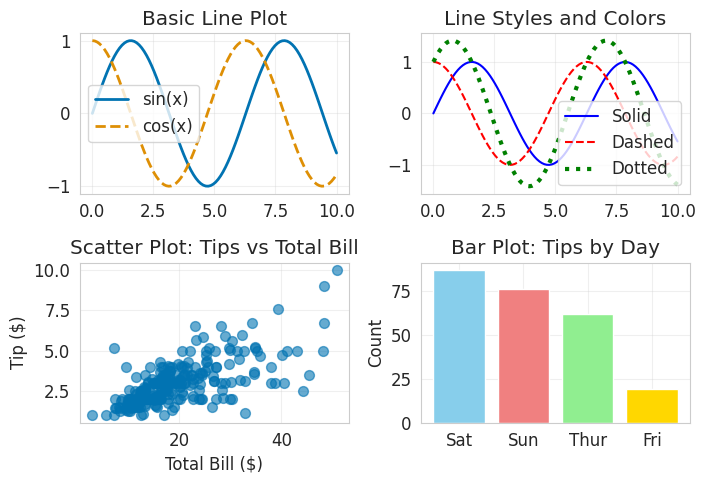

📊 Line plots are ideal for:
   • Time series data
   • Continuous relationships
   • Trend analysis

📊 Scatter plots reveal:
   • Correlations between variables
   • Outliers and clusters
   • Non-linear relationships


In [ ]:
# 2.1 Line Plots - Perfect for time series and continuous data
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

# Simple line plot
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

axes[0, 0].plot(x, y1, label='sin(x)', linewidth=2)
axes[0, 0].plot(x, y2, label='cos(x)', linewidth=2, linestyle='--')
axes[0, 0].set_title('Basic Line Plot')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Multiple lines with different styles
axes[0, 1].plot(x, y1, 'b-', label='Solid')
axes[0, 1].plot(x, y2, 'r--', label='Dashed')
axes[0, 1].plot(x, y1 + y2, 'g:', label='Dotted', linewidth=3)
axes[0, 1].set_title('Line Styles and Colors')
axes[0, 1].legend()

# Scatter plot with tips data
axes[1, 0].scatter(tips['total_bill'], tips['tip'], alpha=0.6, s=50)
axes[1, 0].set_xlabel('Total Bill ($)')
axes[1, 0].set_ylabel('Tip ($)')
axes[1, 0].set_title('Scatter Plot: Tips vs Total Bill')

# Bar plot
day_counts = tips['day'].value_counts()
axes[1, 1].bar(day_counts.index, day_counts.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[1, 1].set_title('Bar Plot: Tips by Day')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("📊 Line plots are ideal for:")
print("   • Time series data")
print("   • Continuous relationships")
print("   • Trend analysis")
print("\n📊 Scatter plots reveal:")
print("   • Correlations between variables")
print("   • Outliers and clusters")
print("   • Non-linear relationships")

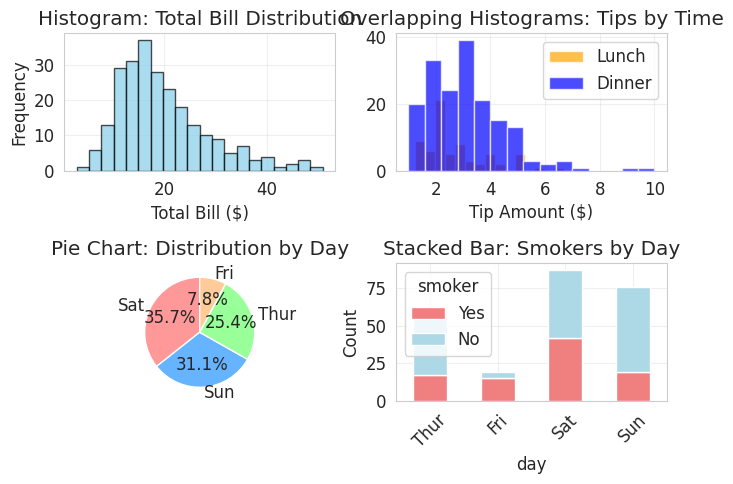

📈 Distribution Analysis:
Total Bill - Mean: $19.79, Std: $8.90
Tip Amount - Mean: $3.00, Std: $1.38
Tip Percentage - Mean: 16.1%


In [ ]:
# 2.2 Histograms and Pie Charts
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

# Basic histogram
axes[0, 0].hist(tips['total_bill'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Histogram: Total Bill Distribution')
axes[0, 0].set_xlabel('Total Bill ($)')
axes[0, 0].set_ylabel('Frequency')

# Overlapping histograms
lunch_tips = tips[tips['time'] == 'Lunch']['tip']
dinner_tips = tips[tips['time'] == 'Dinner']['tip']

axes[0, 1].hist(lunch_tips, bins=15, alpha=0.7, label='Lunch', color='orange')
axes[0, 1].hist(dinner_tips, bins=15, alpha=0.7, label='Dinner', color='blue')
axes[0, 1].set_title('Overlapping Histograms: Tips by Time')
axes[0, 1].set_xlabel('Tip Amount ($)')
axes[0, 1].legend()


# Pie chart
day_counts = tips['day'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

axes[1, 0].pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1, 0].set_title('Pie Chart: Distribution by Day')

#########################################################################################################

# Stacked bar chart
smoker_day = pd.crosstab(tips['day'], tips['smoker'])
smoker_day.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['lightcoral', 'lightblue'])
axes[1, 1].set_title('Stacked Bar: Smokers by Day')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

#########################################################################################################

plt.tight_layout()
plt.show()


# Statistical summary
print("📈 Distribution Analysis:")
print("="*30)
print(f"Total Bill - Mean: ${tips['total_bill'].mean():.2f}, Std: ${tips['total_bill'].std():.2f}")
print(f"Tip Amount - Mean: ${tips['tip'].mean():.2f}, Std: ${tips['tip'].std():.2f}")
print(f"Tip Percentage - Mean: {(tips['tip']/tips['total_bill']*100).mean():.1f}%")

## 3. Customizing Matplotlib Plots

Customization is key to creating professional, publication-ready visualizations. Let's explore comprehensive customization techniques.

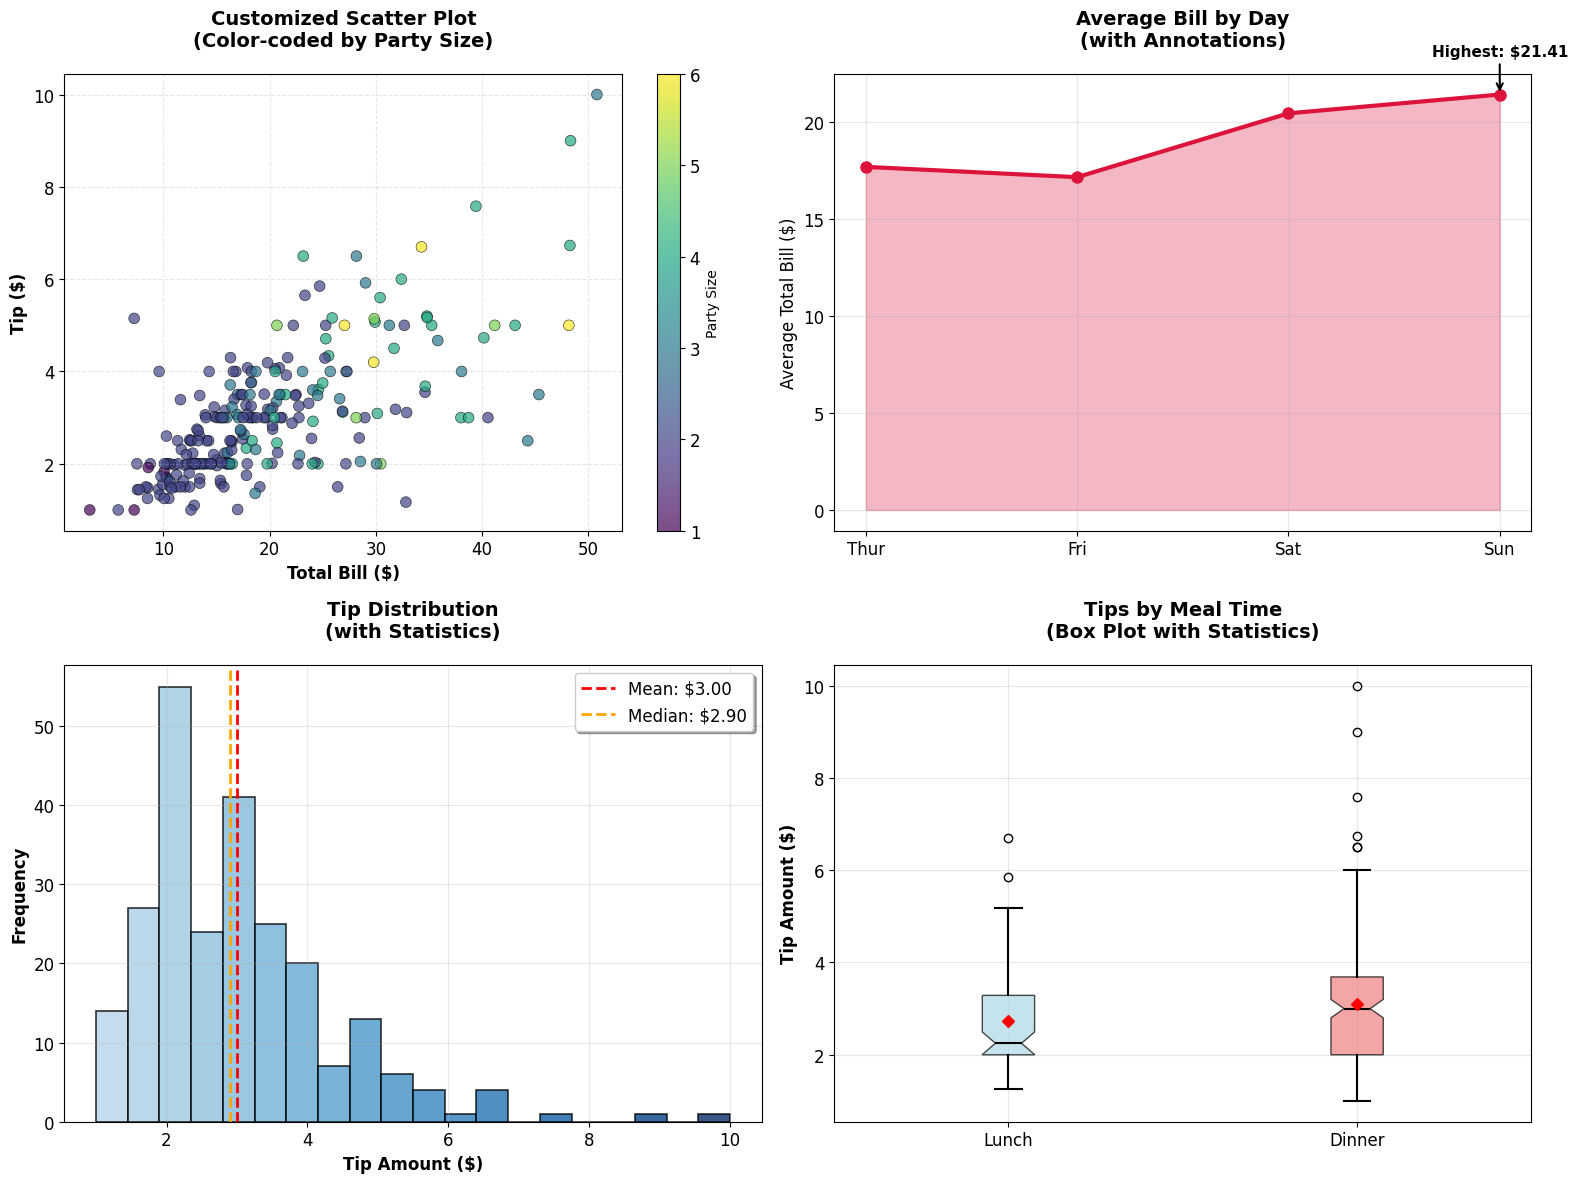

🎨 Customization Features Demonstrated:
✓ Custom color schemes and gradients
✓ Markers, line styles, and transparencies
✓ Annotations and arrows
✓ Statistical reference lines
✓ Professional legends and color bars
✓ Grid customization
✓ Font weights and sizes


In [ ]:
# 3.1 Advanced Plot Customization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Custom colors and markers
x = tips['total_bill']
y = tips['tip']
colors = tips['size']  # Color by party size

scatter = axes[0, 0].scatter(x, y, c=colors, s=60, alpha=0.7, cmap='viridis', edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('Total Bill ($)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Tip ($)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Customized Scatter Plot\n(Color-coded by Party Size)', fontsize=14, fontweight='bold', pad=20)
axes[0, 0].grid(True, alpha=0.3, linestyle='--')
cbar = plt.colorbar(scatter, ax=axes[0, 0])
cbar.set_label('Party Size', fontsize=10)

# Custom line plot with annotations
bill_by_day = tips.groupby('day')['total_bill'].mean()
axes[0, 1].plot(bill_by_day.index, bill_by_day.values, marker='o', linewidth=3, markersize=8, color='crimson')
axes[0, 1].fill_between(bill_by_day.index, bill_by_day.values, alpha=0.3, color='crimson')

# Add annotations
max_day = bill_by_day.idxmax()
max_value = bill_by_day.max()
axes[0, 1].annotate(f'Highest: ${max_value:.2f}',
                    xy=(max_day, max_value), xytext=(max_day, max_value + 2),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
                    fontsize=11, ha='center', fontweight='bold')

axes[0, 1].set_title('Average Bill by Day\n(with Annotations)', fontsize=14, fontweight='bold', pad=20)
axes[0, 1].set_ylabel('Average Total Bill ($)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Styled histogram with multiple customizations
n, bins, patches = axes[1, 0].hist(tips['tip'], bins=20, alpha=0.8, edgecolor='black', linewidth=1.2)

# Color gradient for bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

axes[1, 0].axvline(tips['tip'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${tips["tip"].mean():.2f}')
axes[1, 0].axvline(tips['tip'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: ${tips["tip"].median():.2f}')
axes[1, 0].set_xlabel('Tip Amount ($)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Tip Distribution\n(with Statistics)', fontsize=14, fontweight='bold', pad=20)
axes[1, 0].legend(frameon=True, fancybox=True, shadow=True)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Professional box plot
bp = axes[1, 1].boxplot([tips[tips['time'] == 'Lunch']['tip'].values,
                         tips[tips['time'] == 'Dinner']['tip'].values],
                        labels=['Lunch', 'Dinner'],
                        patch_artist=True,
                        notch=True,
                        showmeans=True)

# Customize box plot colors
colors = ['lightblue', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Customize other elements
for element in ['whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp[element], color='black', linewidth=1.5)

plt.setp(bp['means'], marker='D', markerfacecolor='red', markeredgecolor='red', markersize=6)

axes[1, 1].set_ylabel('Tip Amount ($)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Tips by Meal Time\n(Box Plot with Statistics)', fontsize=14, fontweight='bold', pad=20)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("🎨 Customization Features Demonstrated:")
print("="*45)
print("✓ Custom color schemes and gradients")
print("✓ Markers, line styles, and transparencies")
print("✓ Annotations and arrows")
print("✓ Statistical reference lines")
print("✓ Professional legends and color bars")
print("✓ Grid customization")
print("✓ Font weights and sizes")

## 4. Seaborn Statistical Plots

Seaborn excels at statistical visualization with built-in statistical functions and beautiful default styling. Let's explore regression plots, residual analysis, and confidence intervals.

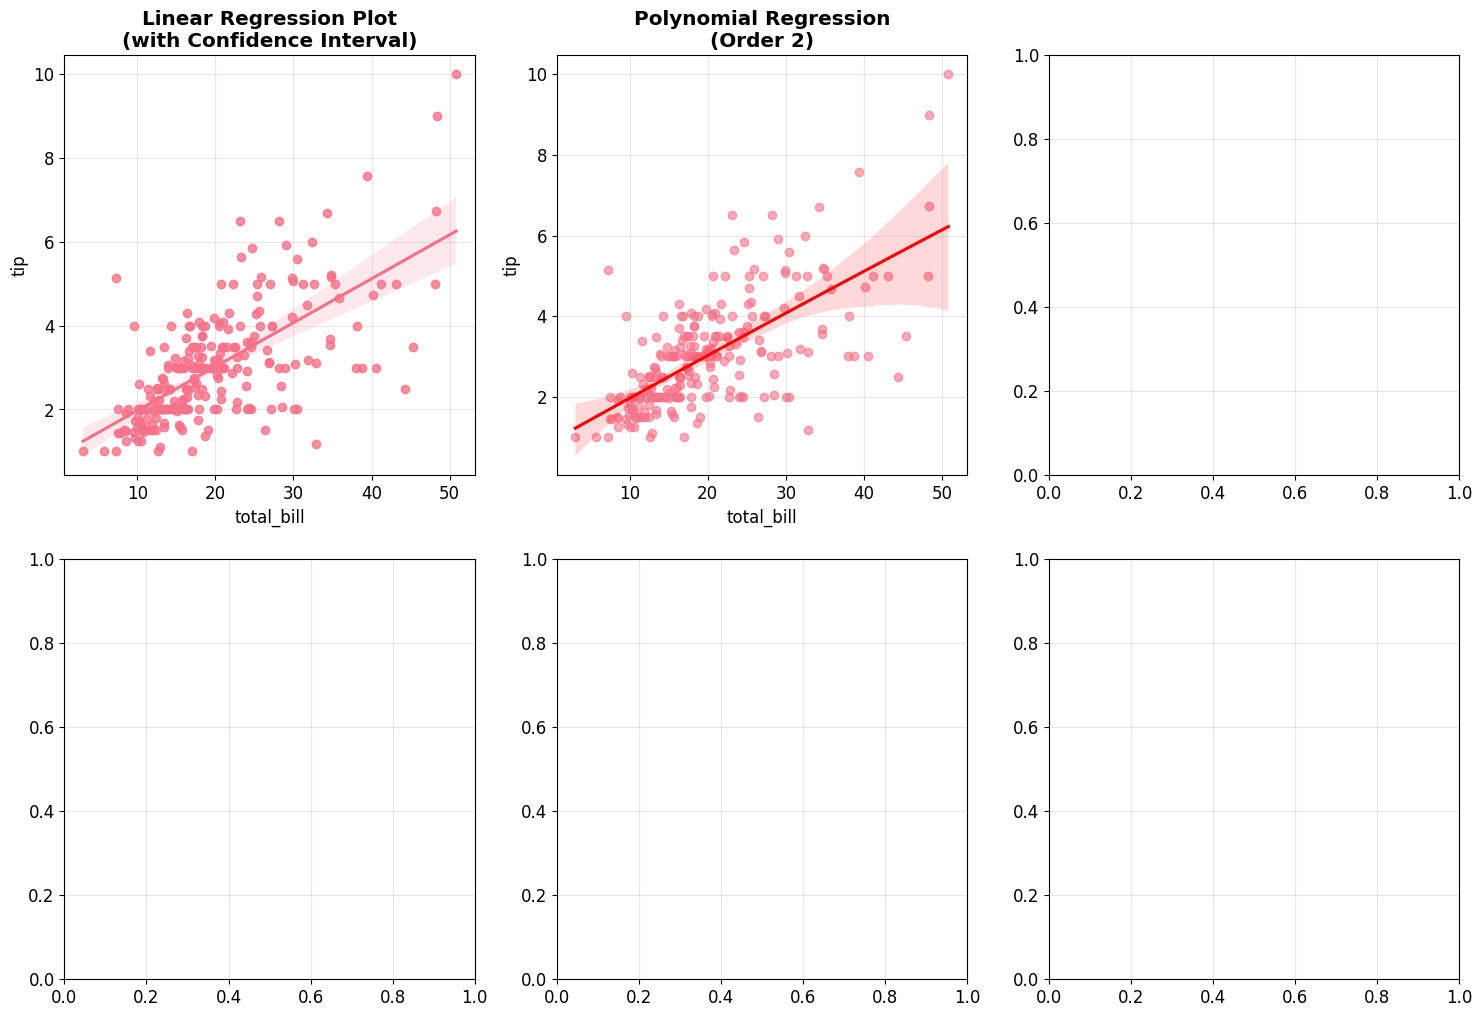

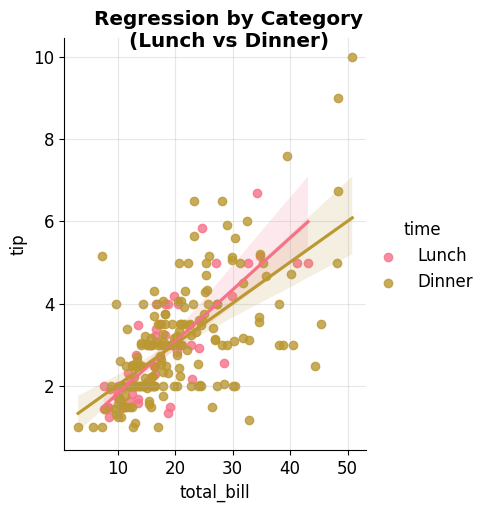

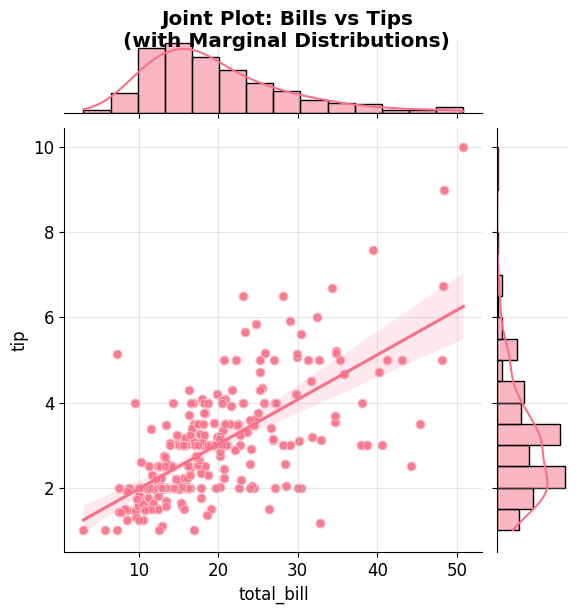

📊 Statistical Insights:
Correlation coefficient: 0.676
R-squared (approx): 0.457
Interpretation: Moderate positive relationship


In [ ]:
# 4.1 Regression and Relationship Plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Basic regression plot
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0, 0])
axes[0, 0].set_title('Linear Regression Plot\n(with Confidence Interval)', fontweight='bold')

# Regression plot with different estimators
sns.regplot(data=tips, x='total_bill', y='tip', order=2, ax=axes[0, 1],
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
axes[0, 1].set_title('Polynomial Regression\n(Order 2)', fontweight='bold')

# Regression plot by category
sns.lmplot(data=tips, x='total_bill', y='tip', hue='time', height=5, aspect=0.8)
plt.suptitle('Regression by Category\n(Lunch vs Dinner)', fontweight='bold', y=1.02)
plt.show()

# Joint plot with multiple views
g = sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg', height=6)
g.plot_joint(sns.scatterplot, alpha=0.6)
g.fig.suptitle('Joint Plot: Bills vs Tips\n(with Marginal Distributions)', fontweight='bold', y=1.02)
plt.show()

print("📊 Statistical Insights:")
print("="*25)
correlation = tips['total_bill'].corr(tips['tip'])
print(f"Correlation coefficient: {correlation:.3f}")
print(f"R-squared (approx): {correlation**2:.3f}")
print(f"Interpretation: {'Strong' if abs(correlation) > 0.7 else 'Moderate' if abs(correlation) > 0.5 else 'Weak'} positive relationship")

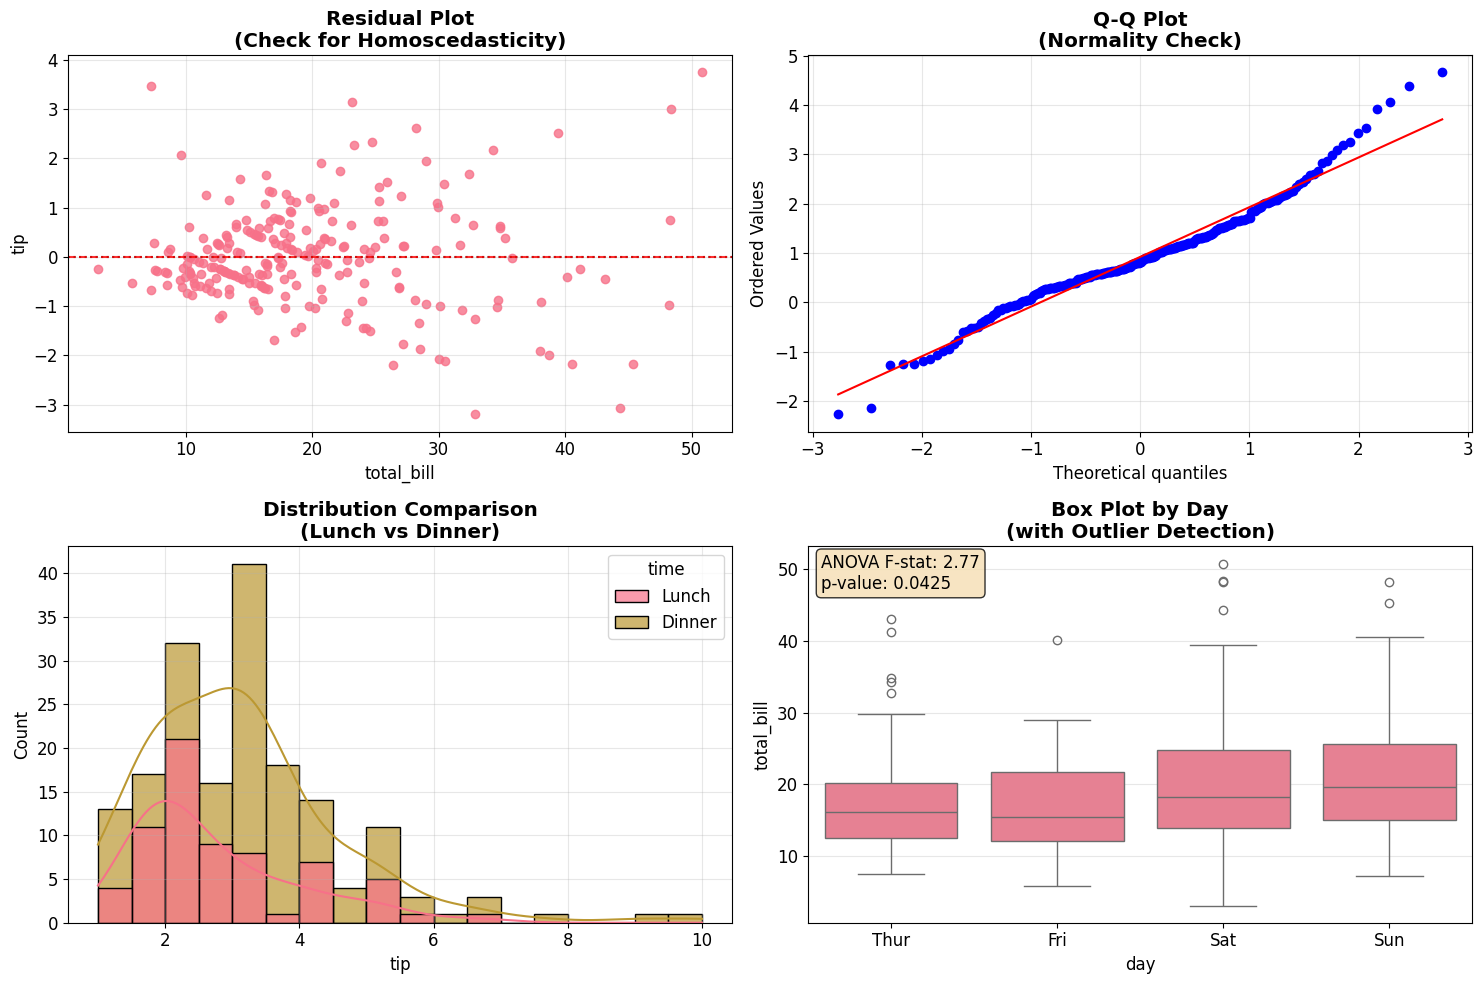

🔬 Statistical Analysis Summary:
Residual Analysis:
  • Mean residual: 0.9203
  • Std residual: 1.0199
  • Residual range: [-2.28, 4.66]

ANOVA Test (Bills by Day):
  • F-statistic: 2.767
  • p-value: 0.0425
  • Significant difference: Yes (α = 0.05)


In [ ]:
# 4.2 Residual Analysis and Advanced Statistical Plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residual plot
sns.residplot(data=tips, x='total_bill', y='tip', ax=axes[0, 0])
axes[0, 0].set_title('Residual Plot\n(Check for Homoscedasticity)', fontweight='bold')
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)

# Q-Q plot for normality check
from scipy import stats
residuals = tips['tip'] - (tips['total_bill'] * tips['tip'].corr(tips['total_bill']) *
                          tips['tip'].std() / tips['total_bill'].std())
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot\n(Normality Check)', fontweight='bold')

# Distribution comparison
sns.histplot(data=tips, x='tip', hue='time', kde=True, ax=axes[1, 0], alpha=0.7)
axes[1, 0].set_title('Distribution Comparison\n(Lunch vs Dinner)', fontweight='bold')

# Box plot with statistical annotations
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot by Day\n(with Outlier Detection)', fontweight='bold')

# Add statistical test results
from scipy.stats import f_oneway
day_groups = [tips[tips['day'] == day]['total_bill'].values for day in tips['day'].unique()]
f_stat, p_value = f_oneway(*day_groups)
axes[1, 1].text(0.02, 0.98, f'ANOVA F-stat: {f_stat:.2f}\np-value: {p_value:.4f}',
                transform=axes[1, 1].transAxes, va='top', ha='left',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Advanced confidence intervals
print("🔬 Statistical Analysis Summary:")
print("="*35)
print("Residual Analysis:")
print(f"  • Mean residual: {residuals.mean():.4f}")
print(f"  • Std residual: {residuals.std():.4f}")
print(f"  • Residual range: [{residuals.min():.2f}, {residuals.max():.2f}]")
print(f"\nANOVA Test (Bills by Day):")
print(f"  • F-statistic: {f_stat:.3f}")
print(f"  • p-value: {p_value:.4f}")
print(f"  • Significant difference: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")

## 5. Distribution Plots

Understanding data distributions is crucial for statistical analysis and model selection. Let's explore comprehensive distribution visualization techniques.

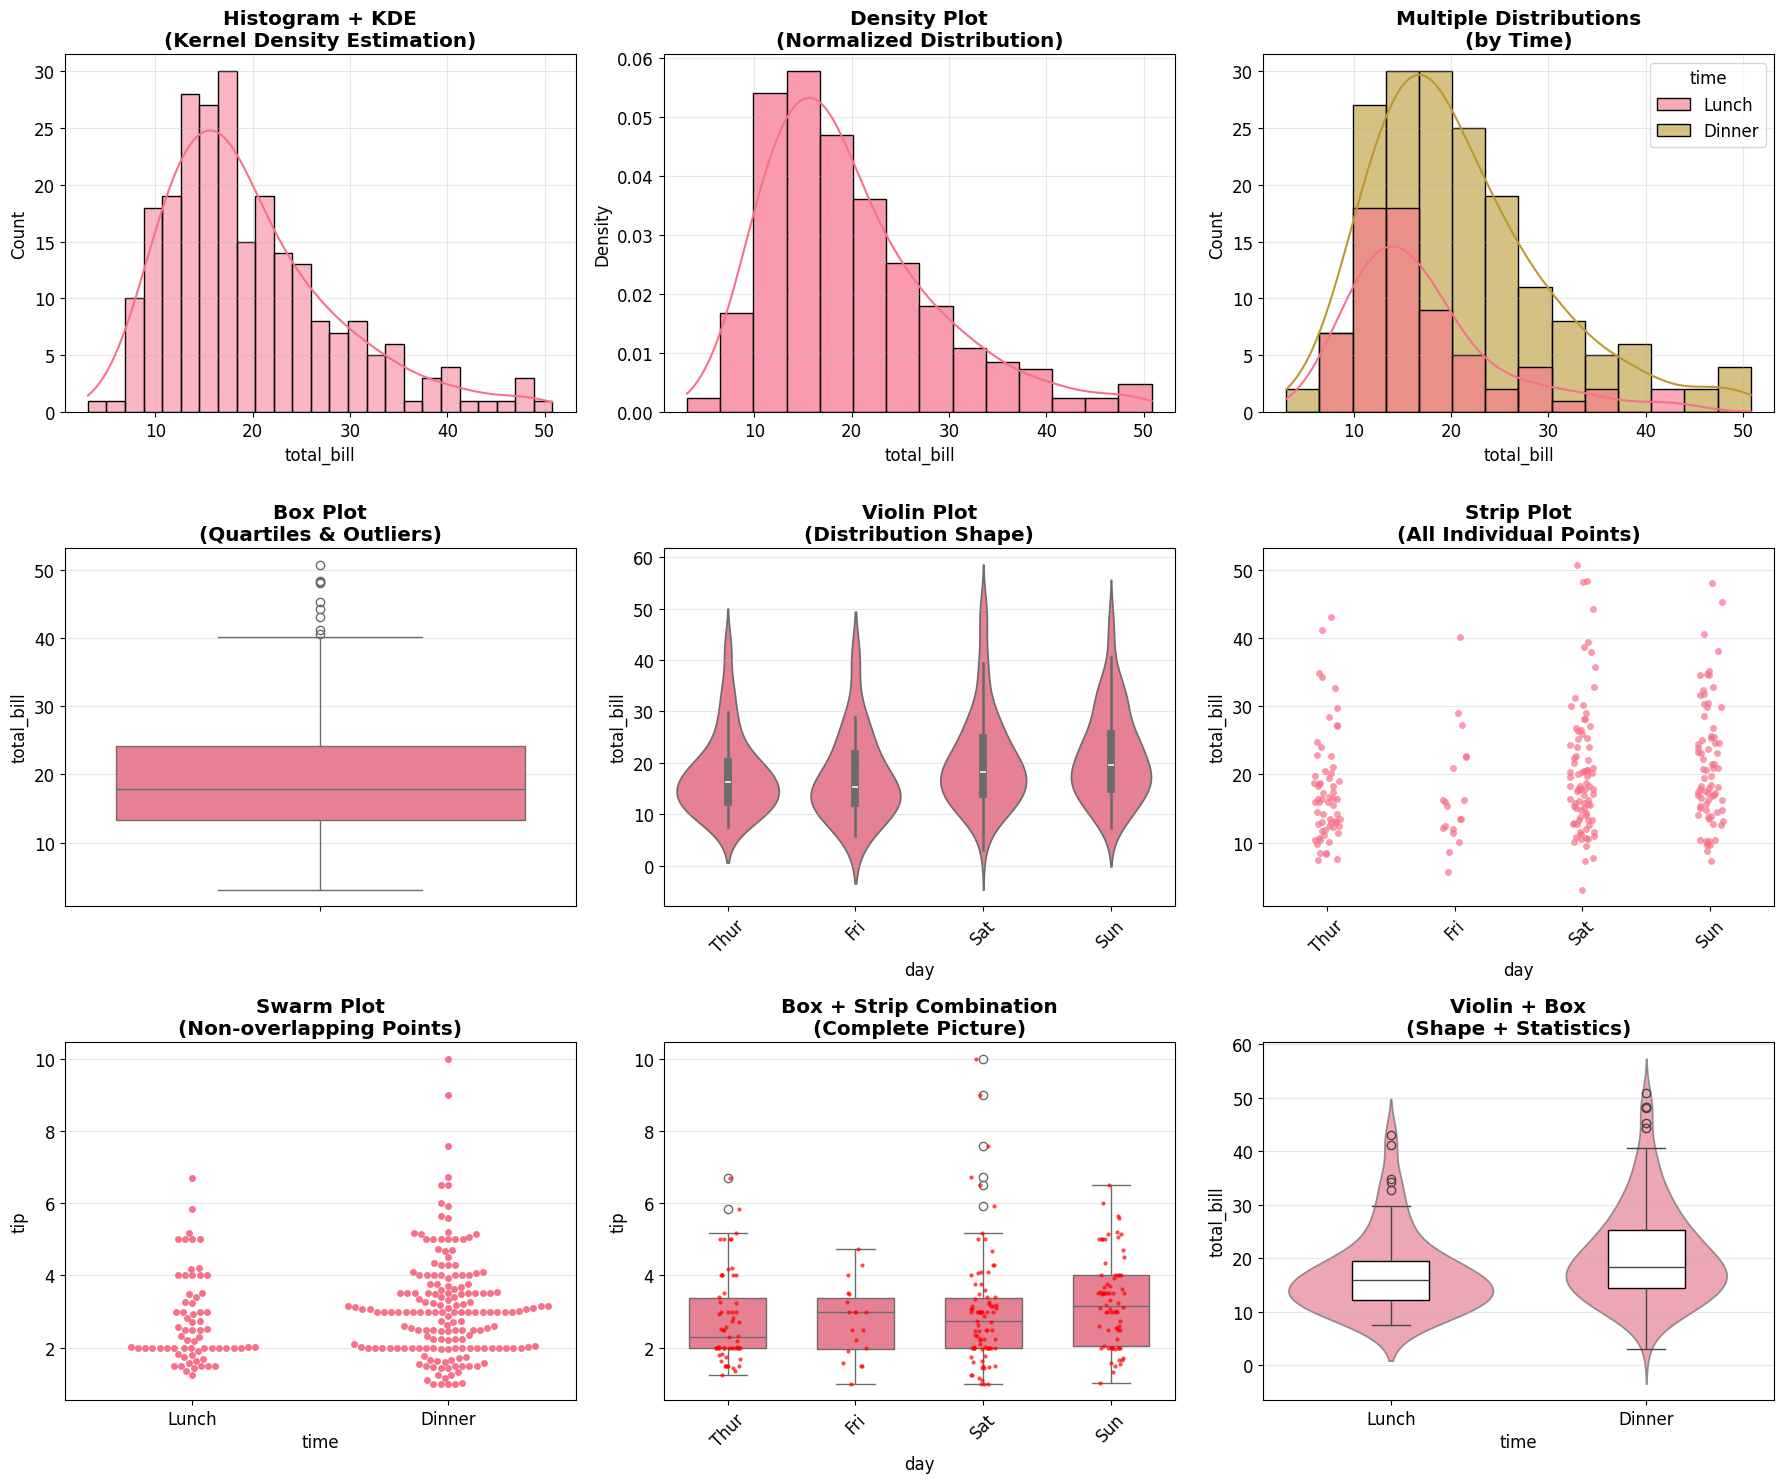

📊 Distribution Statistics:

Total Bill:
  Mean: 19.79
  Median: 17.80
  Mode: 13.42
  Std Dev: 8.90
  Skewness: 1.133
  Kurtosis: 1.218
  Range: [3.07, 50.81]

Tip:
  Mean: 3.00
  Median: 2.90
  Mode: 2.00
  Std Dev: 1.38
  Skewness: 1.465
  Kurtosis: 3.648
  Range: [1.00, 10.00]


In [ ]:
# 5.1 Comprehensive Distribution Analysis
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Histogram with KDE
sns.histplot(data=tips, x='total_bill', kde=True, ax=axes[0, 0], bins=25)
axes[0, 0].set_title('Histogram + KDE\n(Kernel Density Estimation)', fontweight='bold')

# Distribution plot (deprecated but still useful concept)
sns.histplot(data=tips, x='total_bill', stat='density', kde=True, ax=axes[0, 1], alpha=0.7)
axes[0, 1].set_title('Density Plot\n(Normalized Distribution)', fontweight='bold')

# Multiple distributions
sns.histplot(data=tips, x='total_bill', hue='time', kde=True, ax=axes[0, 2], alpha=0.6)
axes[0, 2].set_title('Multiple Distributions\n(by Time)', fontweight='bold')

# Box plots
sns.boxplot(data=tips, y='total_bill', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot\n(Quartiles & Outliers)', fontweight='bold')

# Violin plots
sns.violinplot(data=tips, x='day', y='total_bill', ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot\n(Distribution Shape)', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)

# Strip plot
sns.stripplot(data=tips, x='day', y='total_bill', ax=axes[1, 2], alpha=0.7)
axes[1, 2].set_title('Strip Plot\n(All Individual Points)', fontweight='bold')
axes[1, 2].tick_params(axis='x', rotation=45)

# Swarm plot
sns.swarmplot(data=tips, x='time', y='tip', ax=axes[2, 0])
axes[2, 0].set_title('Swarm Plot\n(Non-overlapping Points)', fontweight='bold')

# Box + Strip combination
sns.boxplot(data=tips, x='day', y='tip', ax=axes[2, 1], width=0.6)
sns.stripplot(data=tips, x='day', y='tip', ax=axes[2, 1], alpha=0.7, color='red', size=3)
axes[2, 1].set_title('Box + Strip Combination\n(Complete Picture)', fontweight='bold')
axes[2, 1].tick_params(axis='x', rotation=45)

# Violin + Box combination
sns.violinplot(data=tips, x='time', y='total_bill', ax=axes[2, 2], inner=None, alpha=0.7)
sns.boxplot(data=tips, x='time', y='total_bill', ax=axes[2, 2], width=0.3,
           boxprops=dict(facecolor='white', edgecolor='black'))
axes[2, 2].set_title('Violin + Box\n(Shape + Statistics)', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical summary of distributions
print("📊 Distribution Statistics:")
print("="*30)
numeric_columns = ['total_bill', 'tip']
for col in numeric_columns:
    data = tips[col]
    print(f"\n{col.replace('_', ' ').title()}:")
    print(f"  Mean: {data.mean():.2f}")
    print(f"  Median: {data.median():.2f}")
    print(f"  Mode: {data.mode().iloc[0]:.2f}")
    print(f"  Std Dev: {data.std():.2f}")
    print(f"  Skewness: {data.skew():.3f}")
    print(f"  Kurtosis: {data.kurtosis():.3f}")
    print(f"  Range: [{data.min():.2f}, {data.max():.2f}]")

## 6. Categorical Data Visualization

Categorical data requires specialized visualization techniques. Let's explore count plots, bar plots, point plots, and advanced categorical analysis.

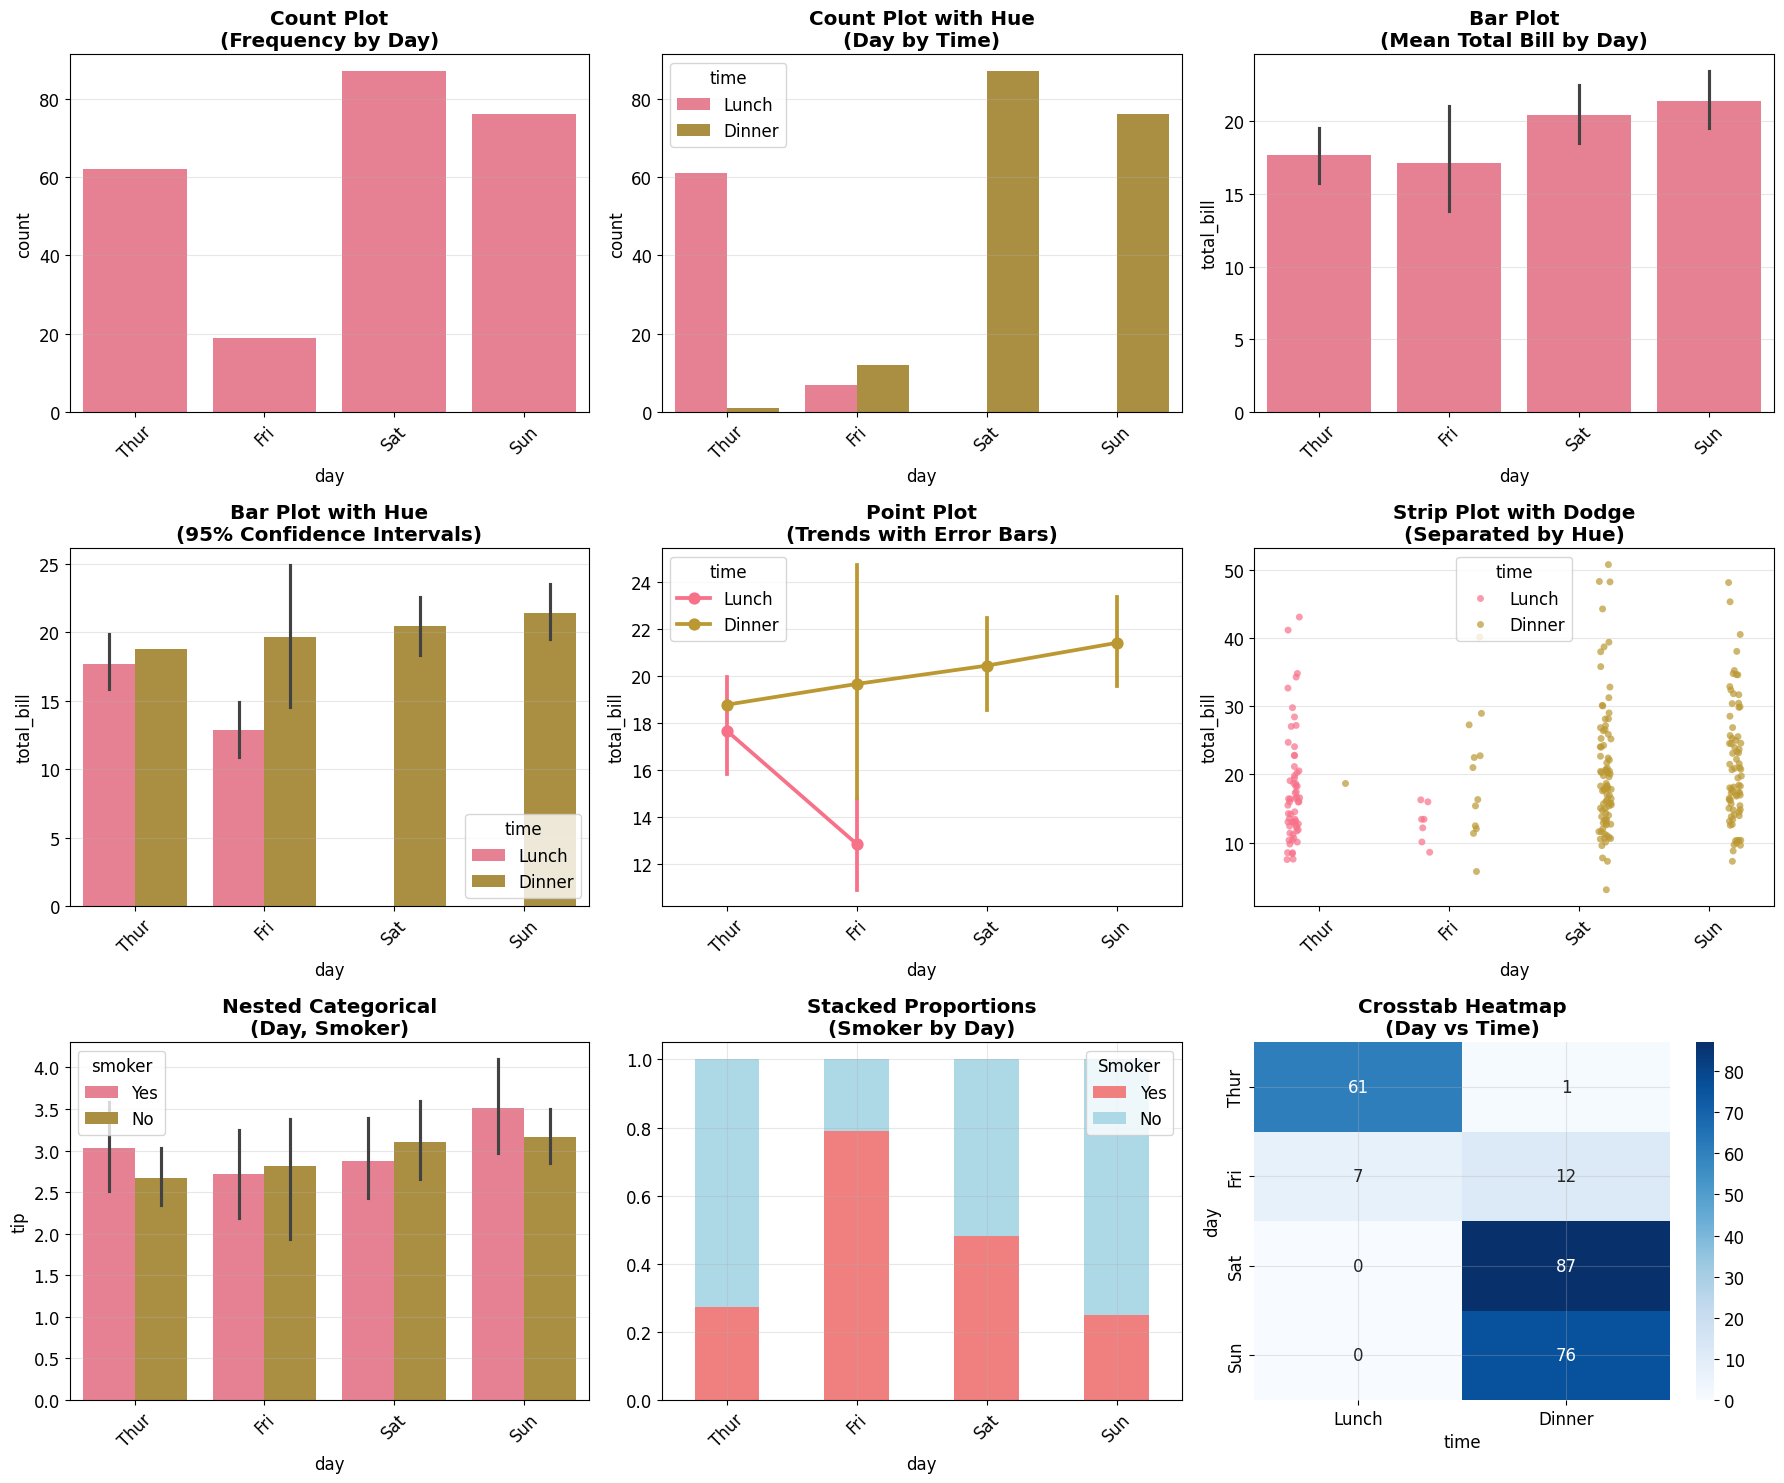

📊 Categorical Data Analysis:
Chi-square Test (Day vs Smoker):
  Chi-square statistic: 25.787
  p-value: 0.0000
  Degrees of freedom: 3
  Independence: Rejected (α = 0.05)

Categorical Summaries:
  Most common day: Sat
  Most common time: Dinner
  Smoker percentage: 38.1%
  Average party size: 2.6 people


In [ ]:
# 6.1 Categorical Data Analysis
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Count plots
sns.countplot(data=tips, x='day', ax=axes[0, 0])
axes[0, 0].set_title('Count Plot\n(Frequency by Day)', fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)

# Count plot with hue
sns.countplot(data=tips, x='day', hue='time', ax=axes[0, 1])
axes[0, 1].set_title('Count Plot with Hue\n(Day by Time)', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bar plot (showing means)
sns.barplot(data=tips, x='day', y='total_bill', ax=axes[0, 2])
axes[0, 2].set_title('Bar Plot\n(Mean Total Bill by Day)', fontweight='bold')
axes[0, 2].tick_params(axis='x', rotation=45)

# Bar plot with hue and error bars
sns.barplot(data=tips, x='day', y='total_bill', hue='time', ax=axes[1, 0], ci=95)
axes[1, 0].set_title('Bar Plot with Hue\n(95% Confidence Intervals)', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# Point plot
sns.pointplot(data=tips, x='day', y='total_bill', hue='time', ax=axes[1, 1])
axes[1, 1].set_title('Point Plot\n(Trends with Error Bars)', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)

# Categorical scatter with jitter
sns.stripplot(data=tips, x='day', y='total_bill', hue='time', ax=axes[1, 2],
             dodge=True, alpha=0.7)
axes[1, 2].set_title('Strip Plot with Dodge\n(Separated by Hue)', fontweight='bold')
axes[1, 2].tick_params(axis='x', rotation=45)

# Nested categorical analysis
sns.barplot(data=tips, x='day', y='tip', hue='smoker', ax=axes[2, 0])
axes[2, 0].set_title('Nested Categorical\n(Day, Smoker)', fontweight='bold')
axes[2, 0].tick_params(axis='x', rotation=45)

# Proportion plot
day_smoker = pd.crosstab(tips['day'], tips['smoker'], normalize='index')
day_smoker.plot(kind='bar', stacked=True, ax=axes[2, 1], color=['lightcoral', 'lightblue'])
axes[2, 1].set_title('Stacked Proportions\n(Smoker by Day)', fontweight='bold')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].legend(title='Smoker')

# Heatmap of categorical relationships
ct = pd.crosstab(tips['day'], tips['time'])
sns.heatmap(ct, annot=True, fmt='d', ax=axes[2, 2], cmap='Blues')
axes[2, 2].set_title('Crosstab Heatmap\n(Day vs Time)', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical analysis of categorical data
print("📊 Categorical Data Analysis:")
print("="*35)

# Chi-square test
from scipy.stats import chi2_contingency
ct = pd.crosstab(tips['day'], tips['smoker'])
chi2, p_val, dof, expected = chi2_contingency(ct)

print("Chi-square Test (Day vs Smoker):")
print(f"  Chi-square statistic: {chi2:.3f}")
print(f"  p-value: {p_val:.4f}")
print(f"  Degrees of freedom: {dof}")
print(f"  Independence: {'Rejected' if p_val < 0.05 else 'Not rejected'} (α = 0.05)")

print(f"\nCategorical Summaries:")
print(f"  Most common day: {tips['day'].mode().iloc[0]}")
print(f"  Most common time: {tips['time'].mode().iloc[0]}")
print(f"  Smoker percentage: {(tips['smoker'] == 'Yes').mean()*100:.1f}%")
print(f"  Average party size: {tips['size'].mean():.1f} people")

## 7. Correlation and Heatmaps

Correlation analysis is fundamental to understanding relationships between variables. Let's explore correlation matrices, heatmaps, and clustering techniques.

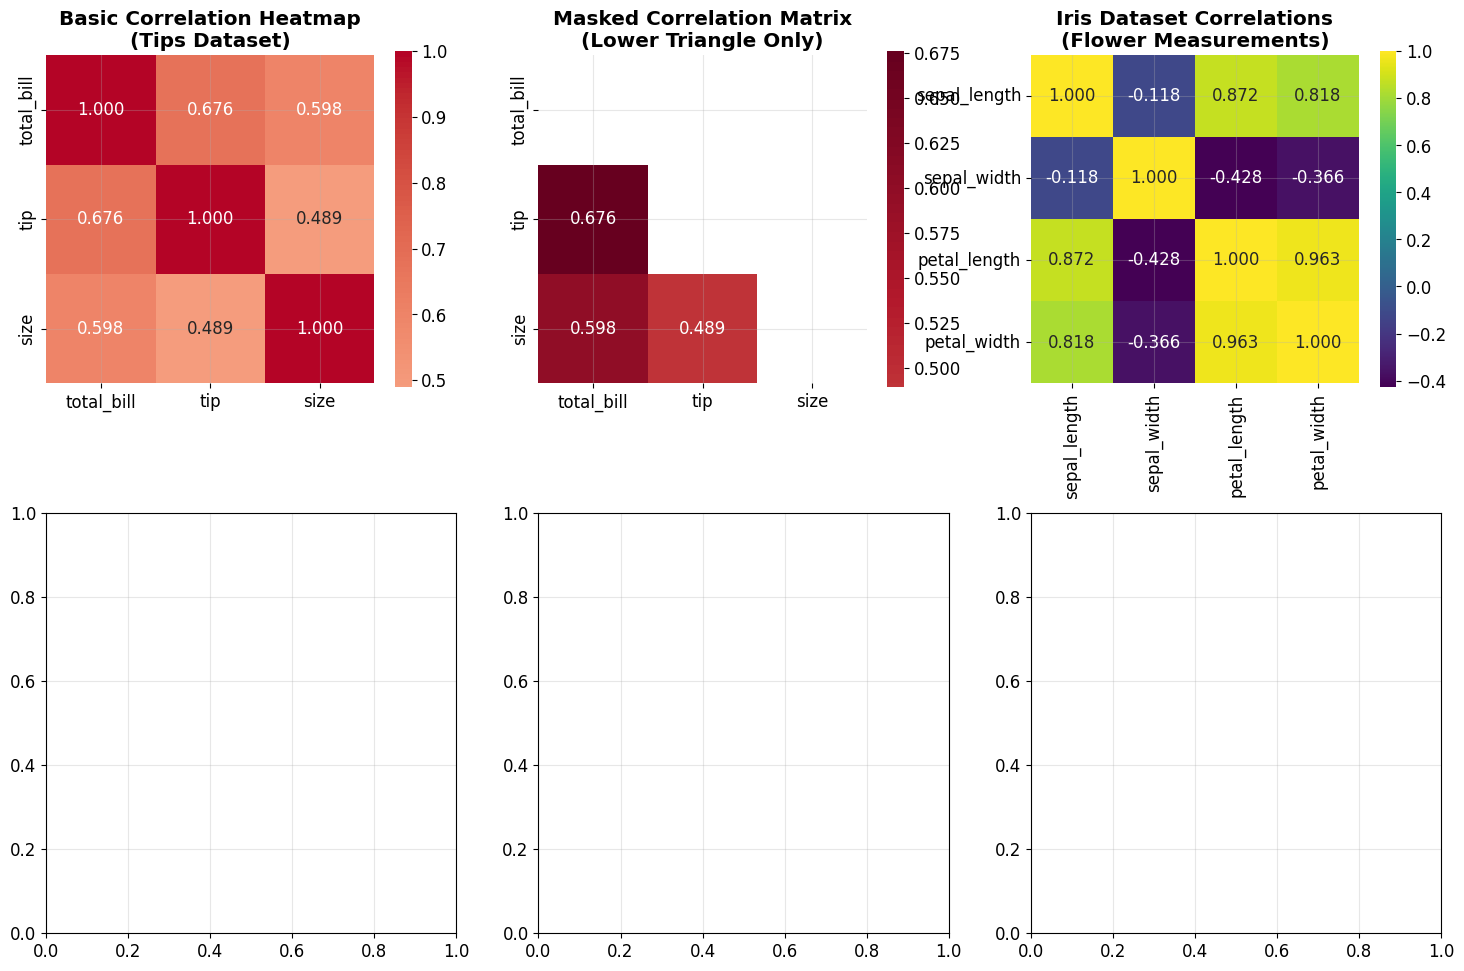

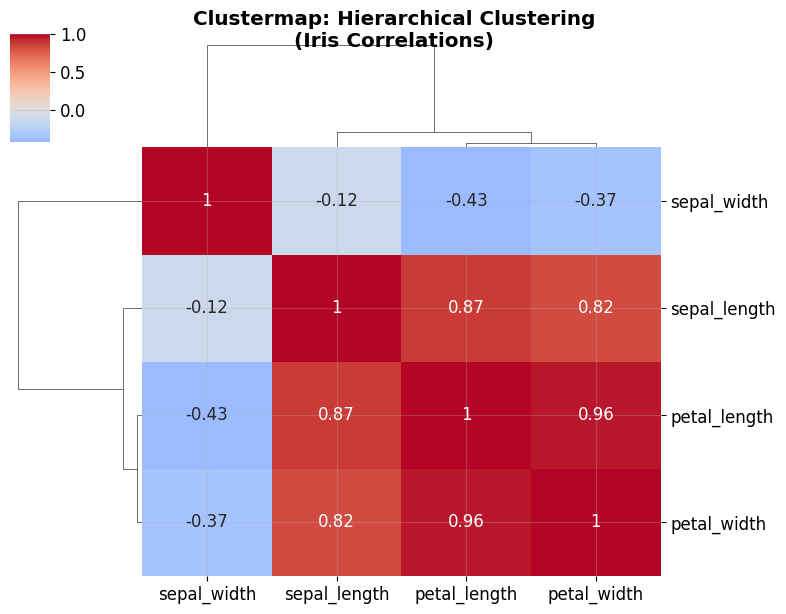

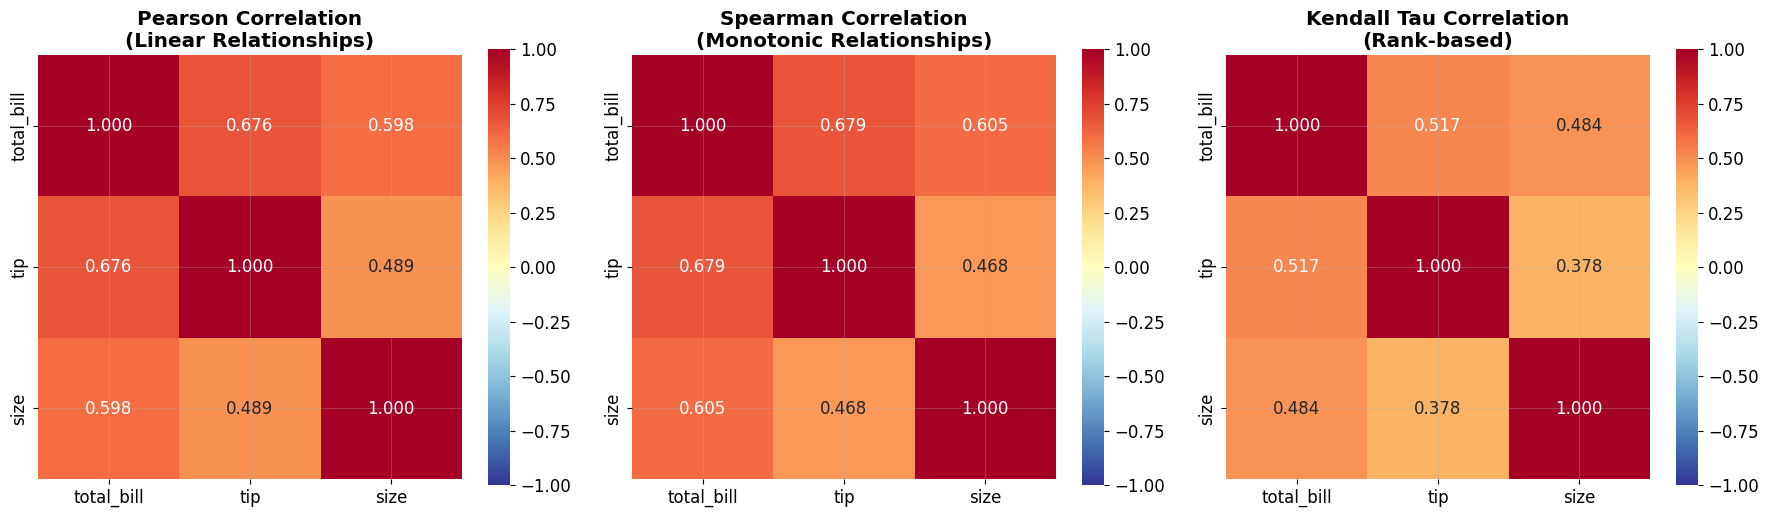

🔍 Detailed Correlation Analysis:

Pearson Correlations:
  total_bill ↔ tip: 0.676 (Moderate Positive)
  total_bill ↔ size: 0.598 (Moderate Positive)
  tip ↔ size: 0.489 (Weak Positive)

Spearman Correlations:
  total_bill ↔ tip: 0.679 (Moderate Positive)
  total_bill ↔ size: 0.605 (Moderate Positive)
  tip ↔ size: 0.468 (Weak Positive)

Kendall Correlations:
  total_bill ↔ tip: 0.517 (Moderate Positive)
  total_bill ↔ size: 0.484 (Weak Positive)
  tip ↔ size: 0.378 (Weak Positive)

📊 Statistical Significance:
total_bill ↔ tip: r=0.676, p=0.0000 (Significant)
total_bill ↔ size: r=0.598, p=0.0000 (Significant)
tip ↔ size: r=0.489, p=0.0000 (Significant)


In [ ]:
# 7.1 Correlation Analysis and Heatmaps
# Prepare numerical data for correlation analysis
tips_numeric = tips.select_dtypes(include=[np.number])
iris_numeric = iris.select_dtypes(include=[np.number])

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Basic correlation heatmap
corr_tips = tips_numeric.corr()
sns.heatmap(corr_tips, annot=True, cmap='coolwarm', center=0, ax=axes[0, 0],
           square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
axes[0, 0].set_title('Basic Correlation Heatmap\n(Tips Dataset)', fontweight='bold')

# Correlation heatmap with mask (upper triangle)
mask = np.triu(np.ones_like(corr_tips, dtype=bool))
sns.heatmap(corr_tips, mask=mask, annot=True, cmap='RdBu_r', center=0, ax=axes[0, 1],
           square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
axes[0, 1].set_title('Masked Correlation Matrix\n(Lower Triangle Only)', fontweight='bold')

# Iris correlation heatmap
corr_iris = iris_numeric.corr()
sns.heatmap(corr_iris, annot=True, cmap='viridis', ax=axes[0, 2],
           square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
axes[0, 2].set_title('Iris Dataset Correlations\n(Flower Measurements)', fontweight='bold')

# Clustermap for hierarchical clustering
g1 = sns.clustermap(corr_iris, annot=True, cmap='coolwarm', center=0,
                   figsize=(8, 6), cbar_kws={'shrink': 0.8})
g1.fig.suptitle('Clustermap: Hierarchical Clustering\n(Iris Correlations)', y=1.02, fontweight='bold')
plt.show()

# Custom heatmap with different correlation types
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pearson correlation
corr_pearson = tips_numeric.corr(method='pearson')
sns.heatmap(corr_pearson, annot=True, cmap='RdYlBu_r', center=0, ax=axes[0],
           square=True, fmt='.3f', vmin=-1, vmax=1)
axes[0].set_title('Pearson Correlation\n(Linear Relationships)', fontweight='bold')

# Spearman correlation
corr_spearman = tips_numeric.corr(method='spearman')
sns.heatmap(corr_spearman, annot=True, cmap='RdYlBu_r', center=0, ax=axes[1],
           square=True, fmt='.3f', vmin=-1, vmax=1)
axes[1].set_title('Spearman Correlation\n(Monotonic Relationships)', fontweight='bold')

# Kendall correlation
corr_kendall = tips_numeric.corr(method='kendall')
sns.heatmap(corr_kendall, annot=True, cmap='RdYlBu_r', center=0, ax=axes[2],
           square=True, fmt='.3f', vmin=-1, vmax=1)
axes[2].set_title('Kendall Tau Correlation\n(Rank-based)', fontweight='bold')

plt.tight_layout()
plt.show()

# Advanced correlation analysis
print("🔍 Detailed Correlation Analysis:")
print("="*40)

correlation_methods = ['pearson', 'spearman', 'kendall']
var_pairs = [('total_bill', 'tip'), ('total_bill', 'size'), ('tip', 'size')]

for method in correlation_methods:
    print(f"\n{method.title()} Correlations:")
    corr_matrix = tips_numeric.corr(method=method)
    for var1, var2 in var_pairs:
        corr_val = corr_matrix.loc[var1, var2]
        strength = 'Strong' if abs(corr_val) > 0.7 else 'Moderate' if abs(corr_val) > 0.5 else 'Weak'
        direction = 'Positive' if corr_val > 0 else 'Negative'
        print(f"  {var1} ↔ {var2}: {corr_val:.3f} ({strength} {direction})")

# Correlation significance testing
from scipy.stats import pearsonr
print(f"\n📊 Statistical Significance:")
print("="*30)
for var1, var2 in var_pairs:
    corr_coef, p_value = pearsonr(tips[var1], tips[var2])
    significance = "Significant" if p_value < 0.05 else "Not significant"
    print(f"{var1} ↔ {var2}: r={corr_coef:.3f}, p={p_value:.4f} ({significance})")

## 8. Multi-plot Figures and Subplots

Complex data analysis often requires multiple visualizations. Let's explore advanced subplot techniques, facet grids, and pair plots for comprehensive data exploration.

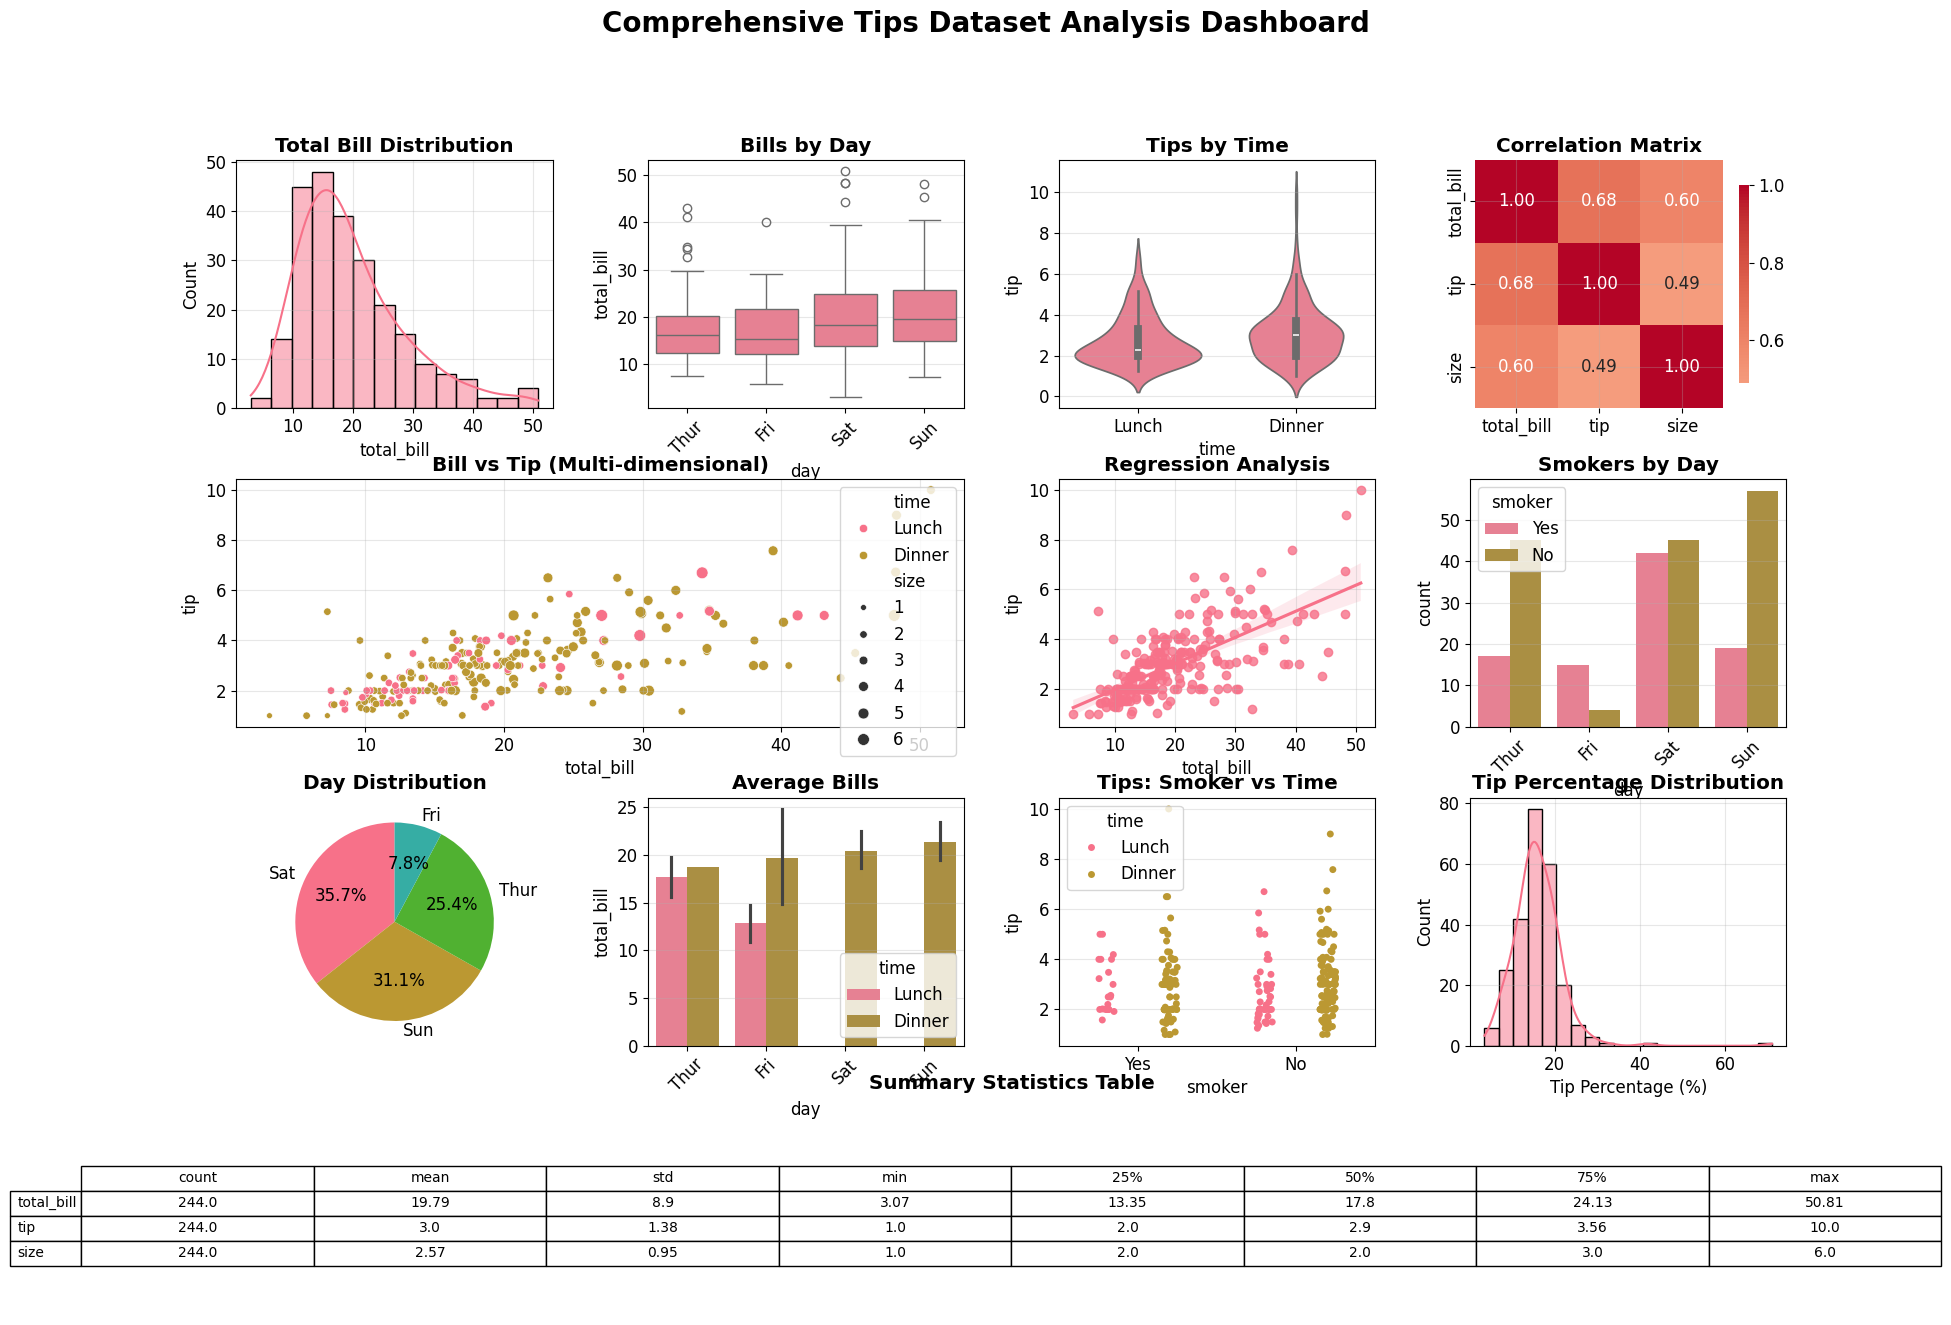

📊 Dashboard Components:
✓ Distribution plots (histogram, box, violin)
✓ Relationship analysis (scatter, regression)
✓ Categorical analysis (count, bar, pie)
✓ Correlation heatmap
✓ Statistical summary table
✓ Multi-dimensional visualizations


In [ ]:
# 8.1 Advanced Multi-plot Layouts
# Create a comprehensive dashboard-style visualization
fig = plt.figure(figsize=(20, 15))

# Define a complex grid layout
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3,
                     height_ratios=[1, 1, 1, 0.8], width_ratios=[1, 1, 1, 1])

# Top row - Distribution analysis
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(data=tips, x='total_bill', kde=True, ax=ax1)
ax1.set_title('Total Bill Distribution', fontweight='bold')

ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=tips, y='total_bill', x='day', ax=ax2)
ax2.set_title('Bills by Day', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

ax3 = fig.add_subplot(gs[0, 2])
sns.violinplot(data=tips, x='time', y='tip', ax=ax3)
ax3.set_title('Tips by Time', fontweight='bold')

ax4 = fig.add_subplot(gs[0, 3])
corr_matrix = tips_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax4,
           square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
ax4.set_title('Correlation Matrix', fontweight='bold')

# Second row - Relationship analysis
ax5 = fig.add_subplot(gs[1, :2])  # Span 2 columns
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', size='size', ax=ax5)
ax5.set_title('Bill vs Tip (Multi-dimensional)', fontweight='bold')

ax6 = fig.add_subplot(gs[1, 2])
sns.regplot(data=tips, x='total_bill', y='tip', ax=ax6)
ax6.set_title('Regression Analysis', fontweight='bold')

ax7 = fig.add_subplot(gs[1, 3])
sns.countplot(data=tips, x='day', hue='smoker', ax=ax7)
ax7.set_title('Smokers by Day', fontweight='bold')
ax7.tick_params(axis='x', rotation=45)

# Third row - Categorical analysis
ax8 = fig.add_subplot(gs[2, 0])
day_counts = tips['day'].value_counts()
ax8.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
ax8.set_title('Day Distribution', fontweight='bold')

ax9 = fig.add_subplot(gs[2, 1])
sns.barplot(data=tips, x='day', y='total_bill', hue='time', ax=ax9)
ax9.set_title('Average Bills', fontweight='bold')
ax9.tick_params(axis='x', rotation=45)

ax10 = fig.add_subplot(gs[2, 2])
sns.stripplot(data=tips, x='smoker', y='tip', hue='time', ax=ax10, dodge=True)
ax10.set_title('Tips: Smoker vs Time', fontweight='bold')

ax11 = fig.add_subplot(gs[2, 3])
tip_pct = tips['tip'] / tips['total_bill'] * 100
sns.histplot(tip_pct, kde=True, ax=ax11, bins=20)
ax11.set_title('Tip Percentage Distribution', fontweight='bold')
ax11.set_xlabel('Tip Percentage (%)')

# Bottom row - Summary statistics
ax12 = fig.add_subplot(gs[3, :])  # Span all columns
summary_stats = tips_numeric.describe().T
ax12.axis('tight')
ax12.axis('off')
table = ax12.table(cellText=summary_stats.round(2).values,
                   rowLabels=summary_stats.index,
                   colLabels=summary_stats.columns,
                   cellLoc='center',
                   loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
ax12.set_title('Summary Statistics Table', fontweight='bold', pad=20)

plt.suptitle('Comprehensive Tips Dataset Analysis Dashboard', fontsize=20, fontweight='bold', y=0.98)
plt.show()

print("📊 Dashboard Components:")
print("="*25)
print("✓ Distribution plots (histogram, box, violin)")
print("✓ Relationship analysis (scatter, regression)")
print("✓ Categorical analysis (count, bar, pie)")
print("✓ Correlation heatmap")
print("✓ Statistical summary table")
print("✓ Multi-dimensional visualizations")

🎯 Advanced Multi-plot Techniques:


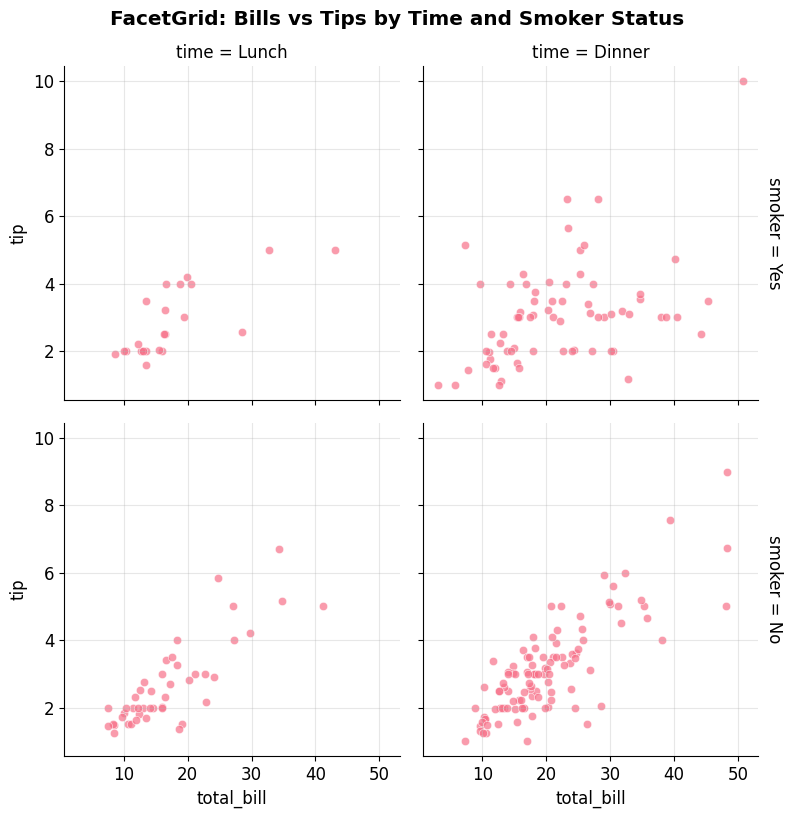

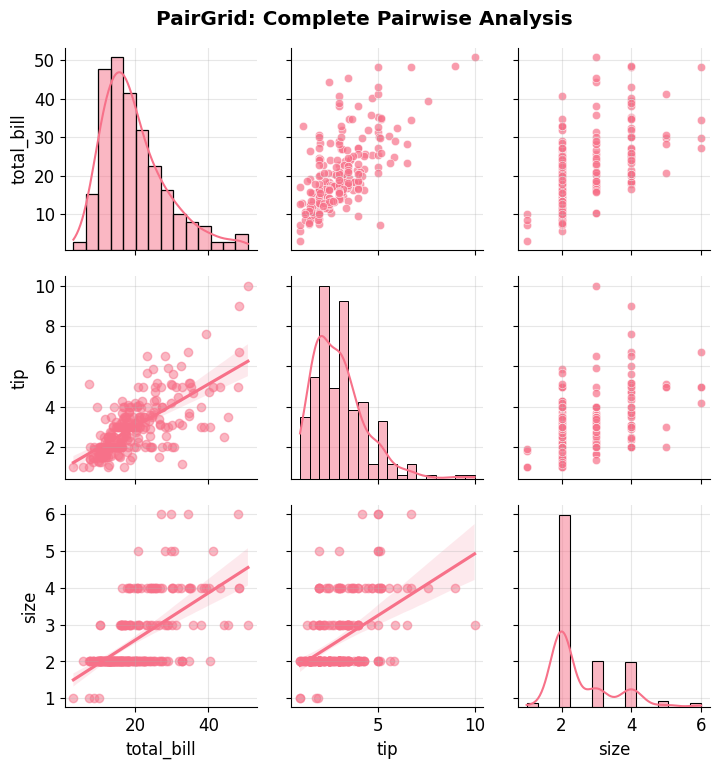

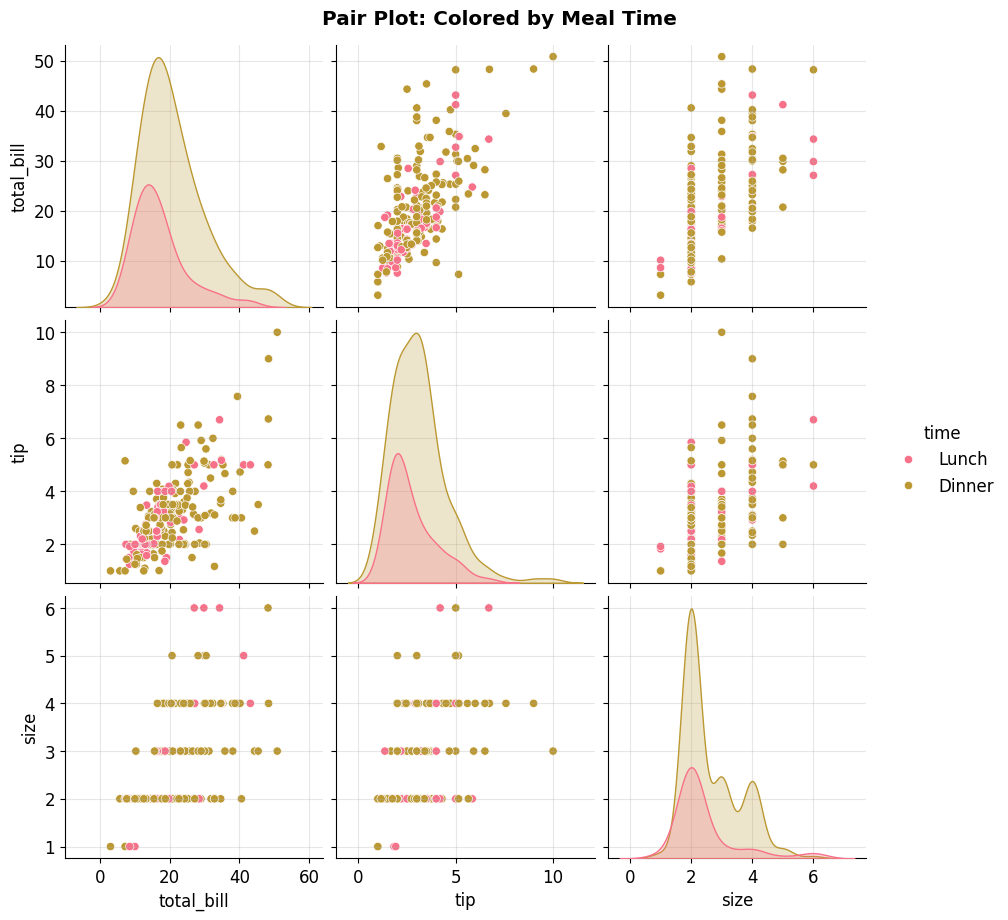

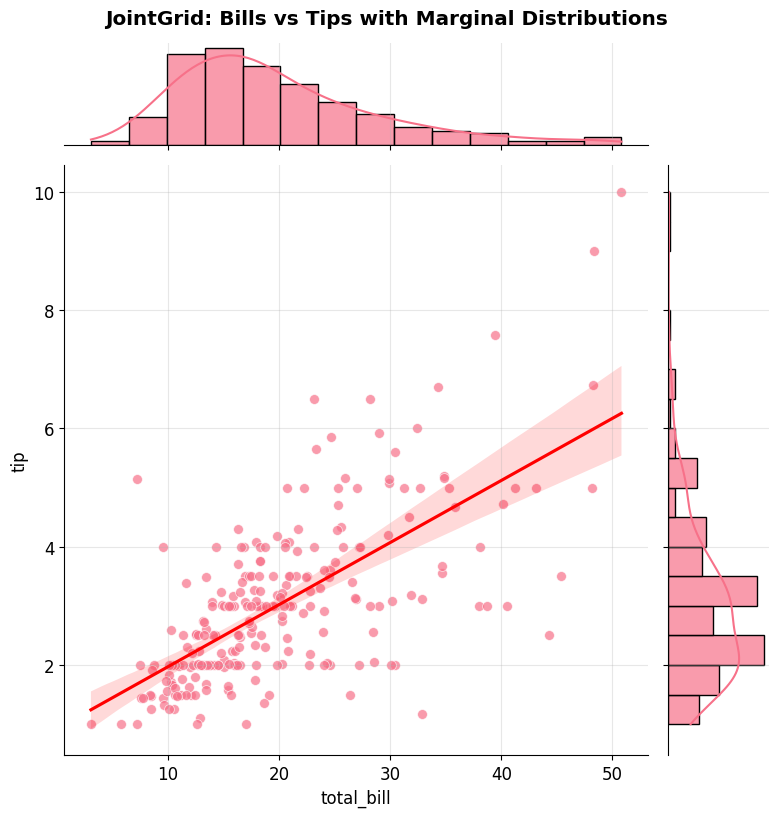

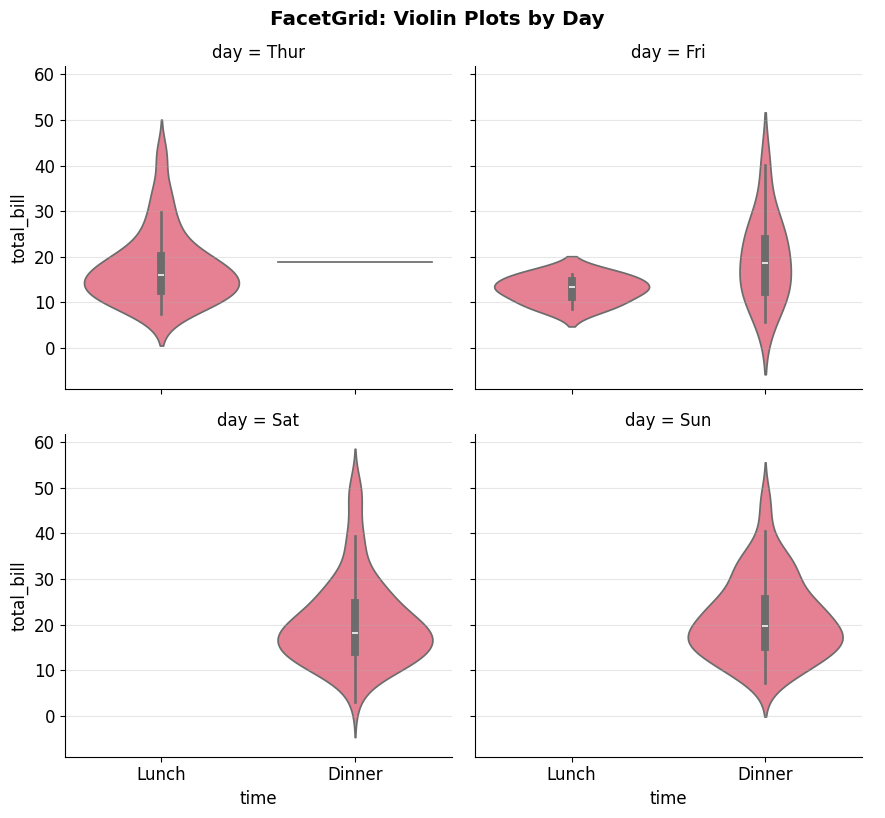

🔍 Facet Grid Benefits:
  • Subset analysis across categories
  • Pattern comparison between groups
  • Reduced cognitive load per plot
  • Consistent scales for comparison

🔍 Pair Plot Benefits:
  • Complete variable relationship overview
  • Correlation patterns identification
  • Feature selection insights
  • Multivariate distribution understanding


In [ ]:
# 8.2 Facet Grids and Pair Plots
print("🎯 Advanced Multi-plot Techniques:")
print("="*35)

# FacetGrid for categorical subsets
g1 = sns.FacetGrid(tips, col='time', row='smoker', margin_titles=True, height=4)
g1.map(sns.scatterplot, 'total_bill', 'tip', alpha=0.7)
g1.add_legend()
g1.fig.suptitle('FacetGrid: Bills vs Tips by Time and Smoker Status', fontweight='bold', y=1.02)
plt.show()

# PairGrid for comprehensive pairwise analysis
g2 = sns.PairGrid(tips_numeric, diag_sharey=False, height=2.5)
g2.map_upper(sns.scatterplot, alpha=0.7)
g2.map_lower(sns.regplot, scatter_kws={'alpha': 0.5})
g2.map_diag(sns.histplot, kde=True)
g2.fig.suptitle('PairGrid: Complete Pairwise Analysis', fontweight='bold', y=1.02)
plt.show()

# Pair plot with categorical hue
g3 = sns.pairplot(tips, hue='time', diag_kind='kde', height=3)
g3.fig.suptitle('Pair Plot: Colored by Meal Time', fontweight='bold', y=1.02)
plt.show()

# JointGrid for detailed bivariate analysis
g4 = sns.JointGrid(data=tips, x='total_bill', y='tip', height=8)
g4.plot_joint(sns.scatterplot, alpha=0.7, s=50)
g4.plot_joint(sns.regplot, scatter=False, color='red')
g4.plot_marginals(sns.histplot, kde=True, alpha=0.7)
g4.fig.suptitle('JointGrid: Bills vs Tips with Marginal Distributions', fontweight='bold', y=1.02)
plt.show()

# Custom FacetGrid with different plot types
g5 = sns.FacetGrid(tips, col='day', col_wrap=2, height=4, aspect=1.1)
g5.map_dataframe(sns.violinplot, x='time', y='total_bill')
g5.add_legend()
g5.fig.suptitle('FacetGrid: Violin Plots by Day', fontweight='bold', y=1.02)
plt.show()

print("🔍 Facet Grid Benefits:")
print("  • Subset analysis across categories")
print("  • Pattern comparison between groups")
print("  • Reduced cognitive load per plot")
print("  • Consistent scales for comparison")

print("\n🔍 Pair Plot Benefits:")
print("  • Complete variable relationship overview")
print("  • Correlation patterns identification")
print("  • Feature selection insights")
print("  • Multivariate distribution understanding")

## 9. Advanced Styling and Themes

Visual aesthetics significantly impact the effectiveness of data communication. Let's explore comprehensive styling options, color palettes, and custom themes.

🎨 Available Seaborn Styles:


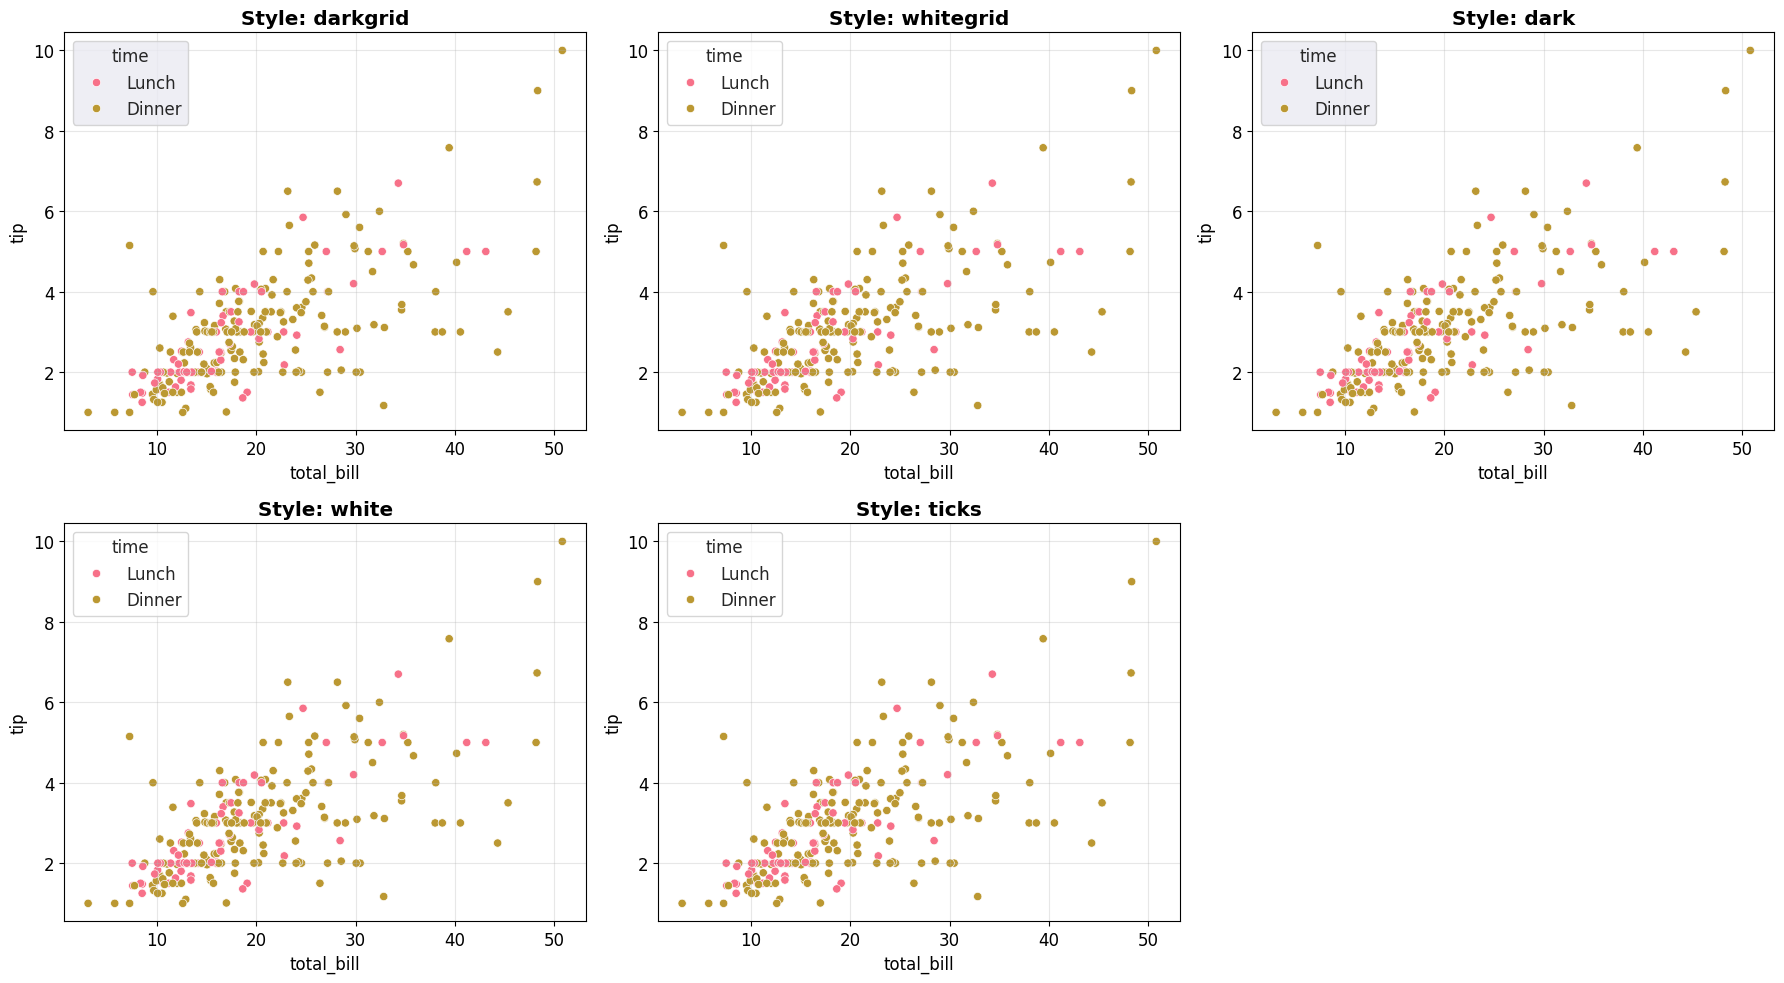

✓ darkgrid: Dark background with white grid lines
✓ whitegrid: White background with gray grid lines
✓ dark: Dark background, no grid
✓ white: White background, no grid
✓ ticks: White background with ticks

🌈 Color Palette Exploration:


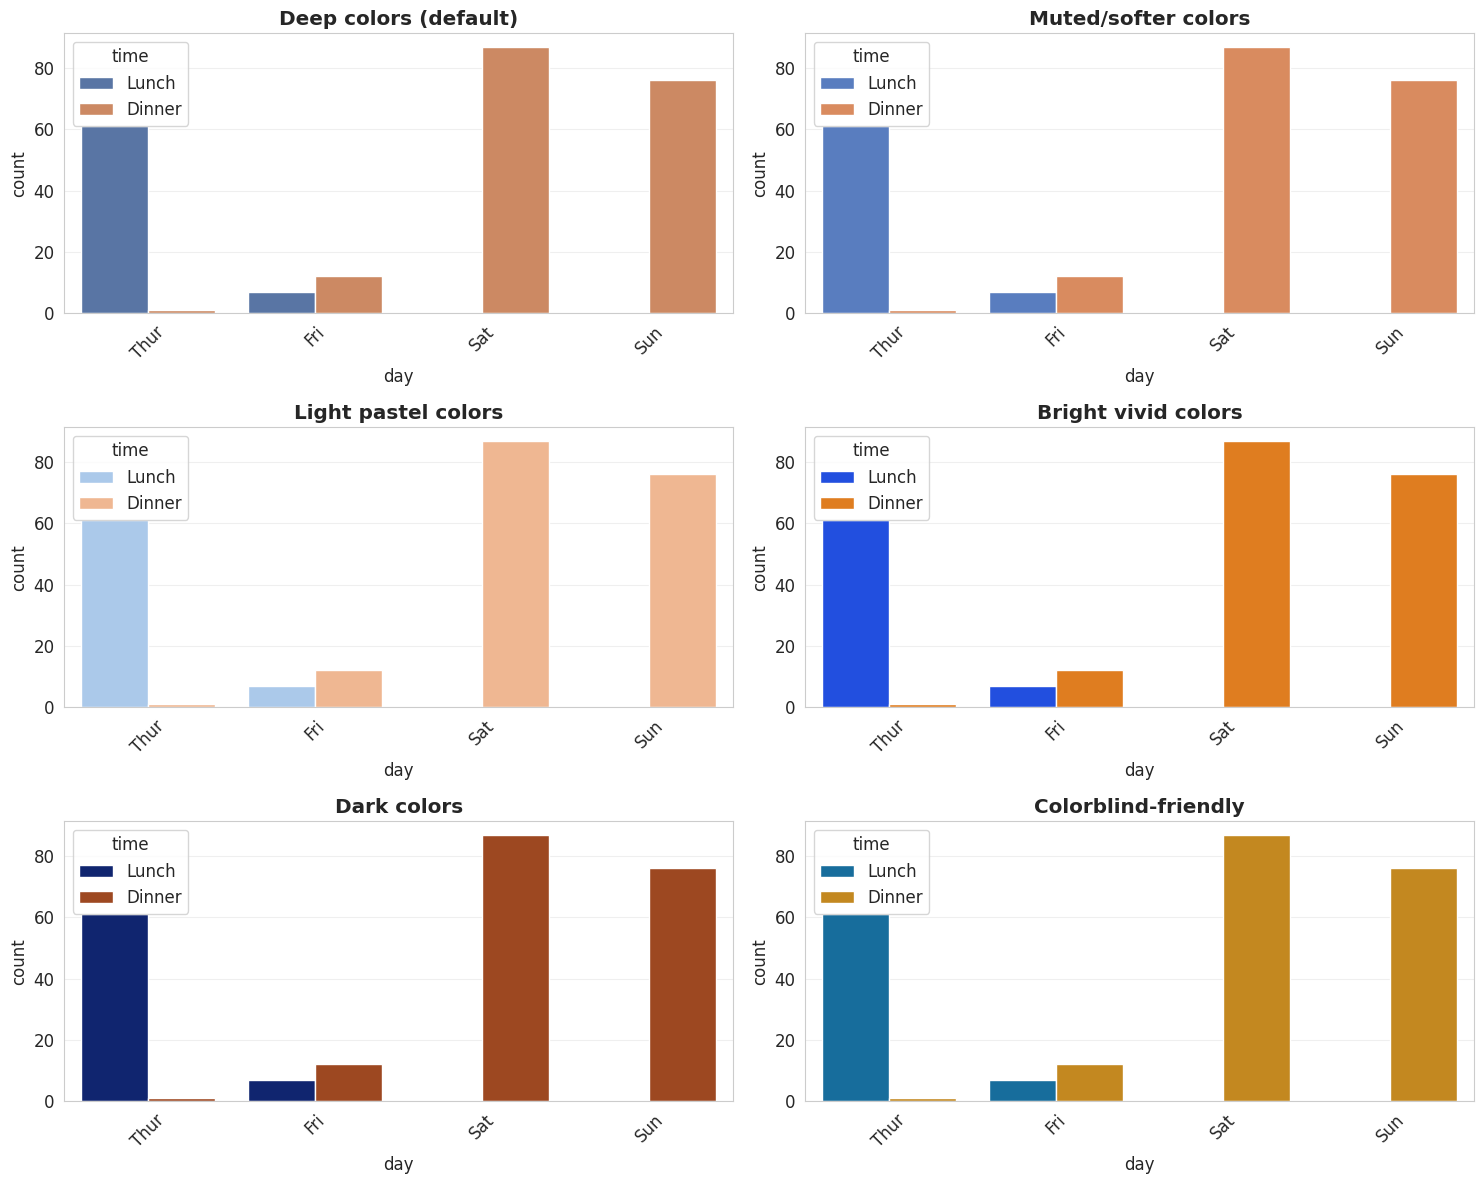


🎯 Custom Color Palettes:


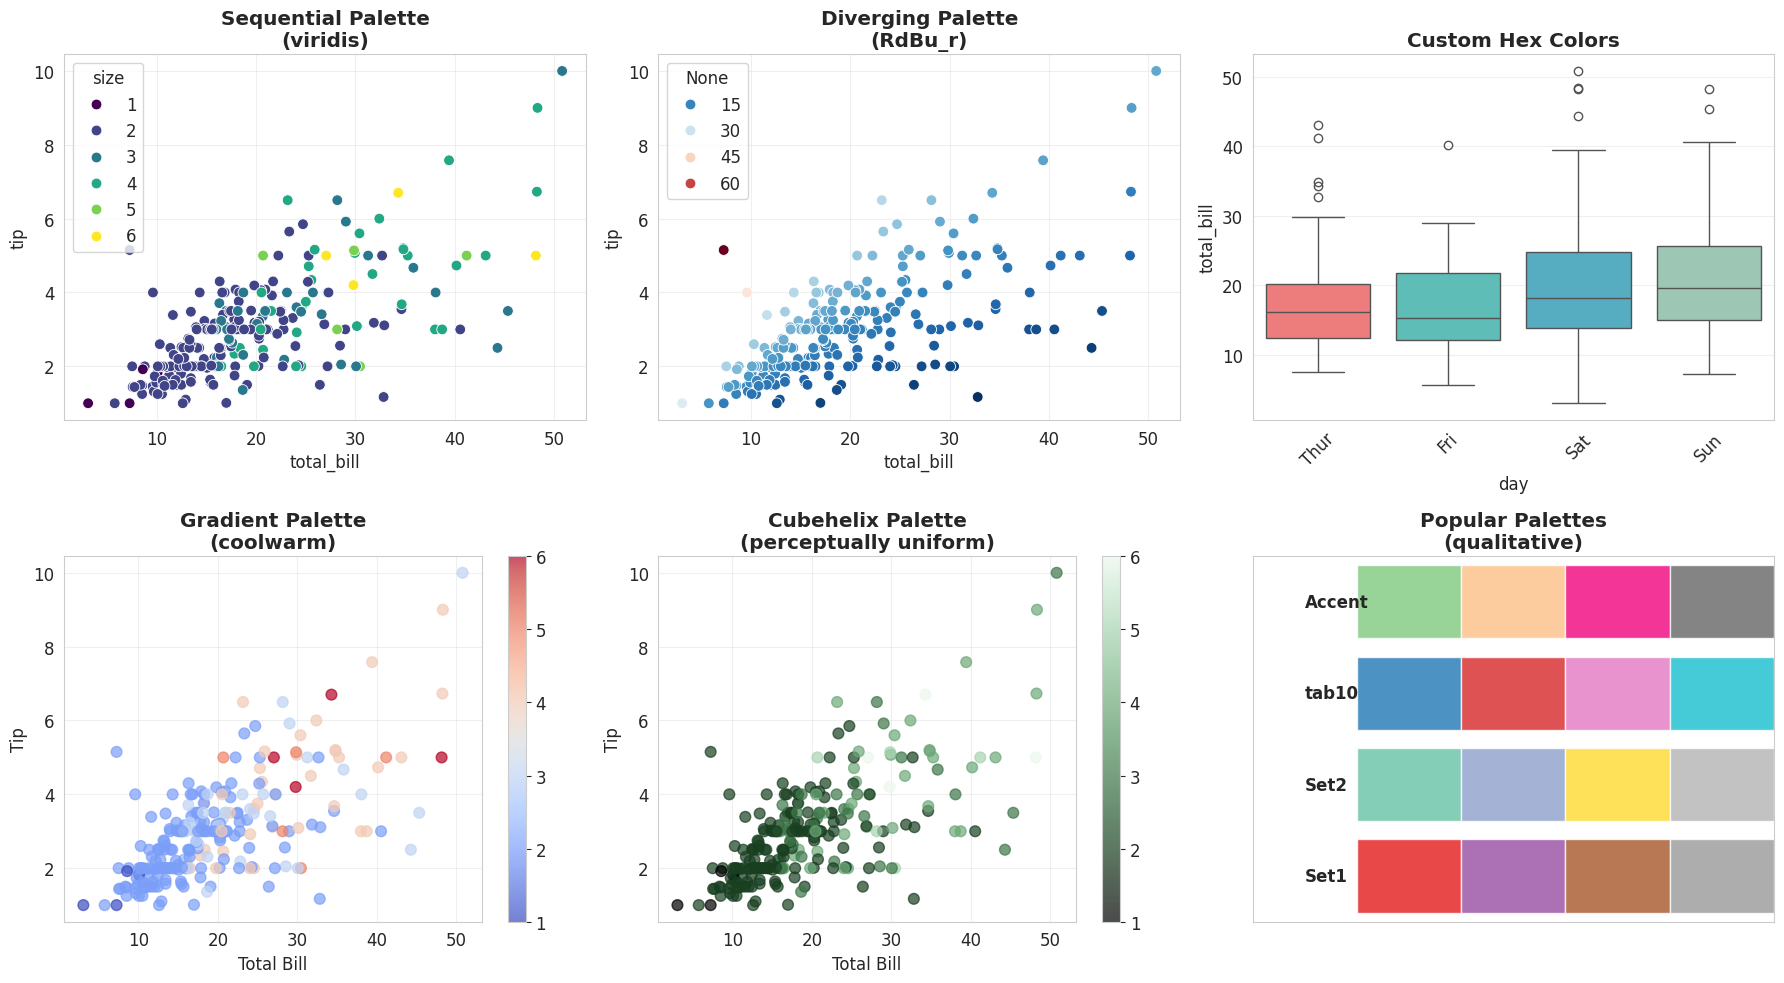

🎨 Palette Guidelines:
  • Sequential: For ordered data (light to dark)
  • Diverging: For data with meaningful center point
  • Qualitative: For categorical data (distinct colors)
  • Consider colorblind accessibility
  • Test readability in grayscale


In [ ]:
# 9.1 Seaborn Styles and Themes
print("🎨 Available Seaborn Styles:")
print("="*30)

# Show all available styles
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, style in enumerate(styles):
    sns.set_style(style)
    ax = axes[i]
    sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=ax)
    ax.set_title(f'Style: {style}', fontweight='bold')
    if i >= len(styles):
        ax.axis('off')

# Reset to default
sns.set_style('whitegrid')
axes[-1].axis('off')
plt.tight_layout()
plt.show()

print("✓ darkgrid: Dark background with white grid lines")
print("✓ whitegrid: White background with gray grid lines")
print("✓ dark: Dark background, no grid")
print("✓ white: White background, no grid")
print("✓ ticks: White background with ticks")

# 9.2 Color Palettes
print(f"\n🌈 Color Palette Exploration:")
print("="*35)

# Different types of color palettes
palette_types = [
    ('deep', 'Deep colors (default)'),
    ('muted', 'Muted/softer colors'),
    ('pastel', 'Light pastel colors'),
    ('bright', 'Bright vivid colors'),
    ('dark', 'Dark colors'),
    ('colorblind', 'Colorblind-friendly')
]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (palette, description) in enumerate(palette_types):
    sns.set_palette(palette)
    ax = axes[i]
    sns.countplot(data=tips, x='day', hue='time', ax=ax)
    ax.set_title(f'{description}', fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Custom color palettes
print(f"\n🎯 Custom Color Palettes:")
print("="*30)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Sequential palette
ax = axes[0, 0]
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size',
               palette='viridis', ax=ax, s=60)
ax.set_title('Sequential Palette\n(viridis)', fontweight='bold')

# Diverging palette
ax = axes[0, 1]
tip_pct = tips['tip'] / tips['total_bill'] * 100
sns.scatterplot(data=tips, x='total_bill', y='tip', hue=tip_pct,
               palette='RdBu_r', ax=ax, s=60)
ax.set_title('Diverging Palette\n(RdBu_r)', fontweight='bold')

# Custom colors
ax = axes[0, 2]
custom_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
sns.boxplot(data=tips, x='day', y='total_bill',
           palette=custom_colors, ax=ax)
ax.set_title('Custom Hex Colors', fontweight='bold')
ax.tick_params(axis='x', rotation=45)

# Gradient palette
ax = axes[1, 0]
gradient_palette = sns.color_palette("coolwarm", as_cmap=True)
scatter = ax.scatter(tips['total_bill'], tips['tip'],
                    c=tips['size'], cmap=gradient_palette, s=60, alpha=0.7)
plt.colorbar(scatter, ax=ax)
ax.set_title('Gradient Palette\n(coolwarm)', fontweight='bold')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

# Cubehelix palette
ax = axes[1, 1]
cubehelix_pal = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
scatter = ax.scatter(tips['total_bill'], tips['tip'],
                    c=tips['size'], cmap=cubehelix_pal, s=60, alpha=0.7)
plt.colorbar(scatter, ax=ax)
ax.set_title('Cubehelix Palette\n(perceptually uniform)', fontweight='bold')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

# Palette demonstration
ax = axes[1, 2]
palettes_demo = ['Set1', 'Set2', 'tab10', 'Accent']
for i, pal in enumerate(palettes_demo):
    colors = plt.cm.get_cmap(pal)(np.linspace(0, 1, 4))
    ax.barh(i, [1, 1, 1, 1], left=[0, 1, 2, 3], color=colors, alpha=0.8)
    ax.text(-0.5, i, pal, va='center', fontweight='bold')

ax.set_xlim(-1, 4)
ax.set_ylim(-0.5, len(palettes_demo) - 0.5)
ax.set_title('Popular Palettes\n(qualitative)', fontweight='bold')
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

print("🎨 Palette Guidelines:")
print("  • Sequential: For ordered data (light to dark)")
print("  • Diverging: For data with meaningful center point")
print("  • Qualitative: For categorical data (distinct colors)")
print("  • Consider colorblind accessibility")
print("  • Test readability in grayscale")

## 10. Interactive Features and Annotations

Effective data visualization often requires annotations, labels, and interactive elements to guide the viewer's attention and provide context.

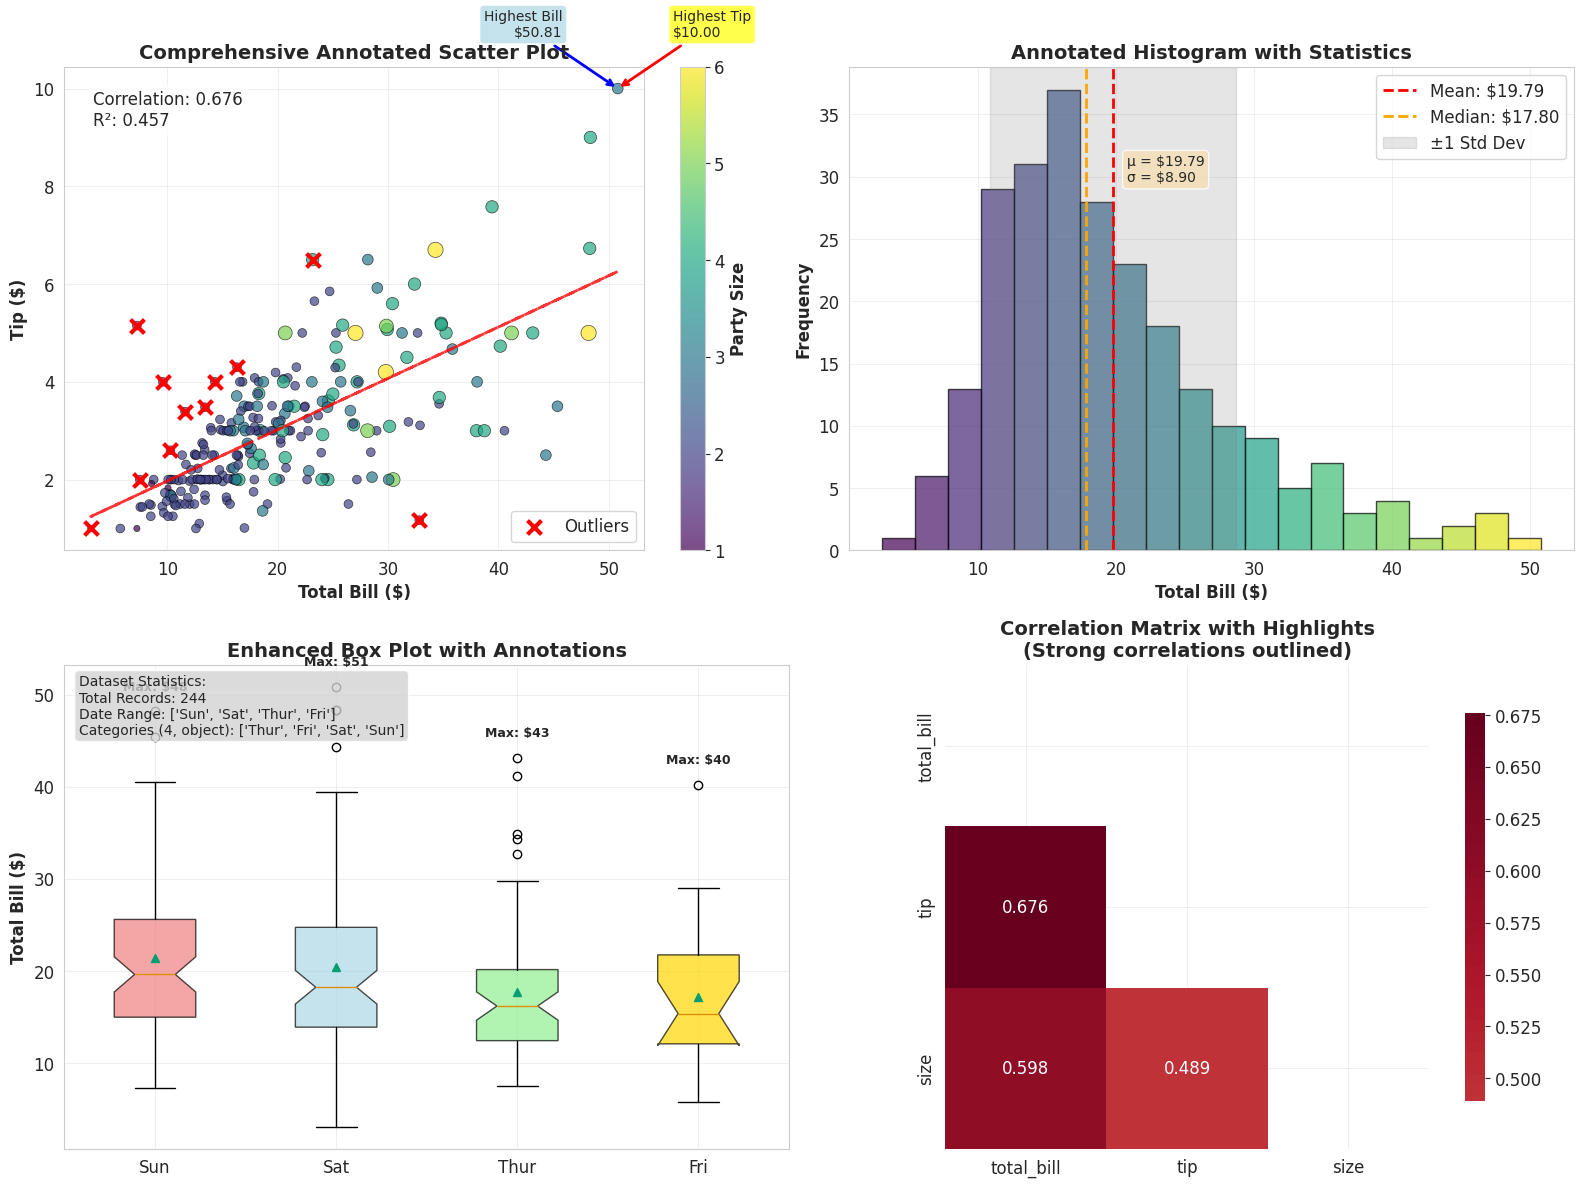

🎯 Annotation Techniques Demonstrated:
✓ Arrows and callouts for key points
✓ Statistical reference lines and regions
✓ Color-coded elements
✓ Text boxes with background styling
✓ Dynamic positioning based on data
✓ Multi-layered information display
✓ Highlighting outliers and patterns
✓ Interactive legends and colorbars


In [ ]:
# 10.1 Advanced Annotations and Interactive Elements
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Advanced scatter plot with comprehensive annotations
ax = axes[0, 0]
scatter = ax.scatter(tips['total_bill'], tips['tip'],
                    c=tips['size'], s=tips['size']*20,
                    alpha=0.7, cmap='viridis', edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(tips['total_bill'], tips['tip'], 1)
p = np.poly1d(z)
ax.plot(tips['total_bill'], p(tips['total_bill']), "r--", alpha=0.8, linewidth=2)

# Highlight outliers
tip_pct = tips['tip'] / tips['total_bill'] * 100
outliers = tips[(tip_pct > 25) | (tip_pct < 5)]
ax.scatter(outliers['total_bill'], outliers['tip'],
          color='red', s=100, marker='x', linewidth=3, label='Outliers')

# Add annotations for interesting points
max_tip_idx = tips['tip'].idxmax()
max_bill_idx = tips['total_bill'].idxmax()

ax.annotate(f'Highest Tip\n${tips.loc[max_tip_idx, "tip"]:.2f}',
           xy=(tips.loc[max_tip_idx, 'total_bill'], tips.loc[max_tip_idx, 'tip']),
           xytext=(tips.loc[max_tip_idx, 'total_bill'] + 5, tips.loc[max_tip_idx, 'tip'] + 1),
           arrowprops=dict(arrowstyle='->', color='red', lw=2),
           fontsize=10, ha='left', va='bottom',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax.annotate(f'Highest Bill\n${tips.loc[max_bill_idx, "total_bill"]:.2f}',
           xy=(tips.loc[max_bill_idx, 'total_bill'], tips.loc[max_bill_idx, 'tip']),
           xytext=(tips.loc[max_bill_idx, 'total_bill'] - 5, tips.loc[max_bill_idx, 'tip'] + 1),
           arrowprops=dict(arrowstyle='->', color='blue', lw=2),
           fontsize=10, ha='right', va='bottom',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))

# Add statistical information
correlation = tips['total_bill'].corr(tips['tip'])
ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}\nR²: {correlation**2:.3f}',
        transform=ax.transAxes, fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.set_title('Comprehensive Annotated Scatter Plot', fontweight='bold', fontsize=14)
ax.set_xlabel('Total Bill ($)', fontweight='bold')
ax.set_ylabel('Tip ($)', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Party Size', fontweight='bold')

# Histogram with annotations
ax = axes[0, 1]
n, bins, patches = ax.hist(tips['total_bill'], bins=20, alpha=0.7, edgecolor='black')

# Color bars based on value
colors = plt.cm.viridis(np.linspace(0, 1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Add statistical lines
mean_val = tips['total_bill'].mean()
median_val = tips['total_bill'].median()
std_val = tips['total_bill'].std()

ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_val:.2f}')
ax.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: ${median_val:.2f}')
ax.axvspan(mean_val - std_val, mean_val + std_val, alpha=0.2, color='gray', label='±1 Std Dev')

# Add text annotations
ax.text(mean_val + 1, max(n) * 0.8, f'μ = ${mean_val:.2f}\nσ = ${std_val:.2f}',
        fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_title('Annotated Histogram with Statistics', fontweight='bold', fontsize=14)
ax.set_xlabel('Total Bill ($)', fontweight='bold')
ax.set_ylabel('Frequency', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Box plot with detailed annotations
ax = axes[1, 0]
bp = ax.boxplot([tips[tips['day'] == day]['total_bill'].values for day in tips['day'].unique()],
               labels=tips['day'].unique(), patch_artist=True, notch=True, showmeans=True)

# Customize colors
colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add custom annotations for each box
for i, day in enumerate(tips['day'].unique()):
    day_data = tips[tips['day'] == day]['total_bill']
    ax.text(i + 1, day_data.max() + 2, f'Max: ${day_data.max():.0f}',
           ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add overall statistics
ax.text(0.02, 0.98, f'Dataset Statistics:\nTotal Records: {len(tips)}\nDate Range: {tips["day"].unique()}',
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

ax.set_title('Enhanced Box Plot with Annotations', fontweight='bold', fontsize=14)
ax.set_ylabel('Total Bill ($)', fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Correlation heatmap with annotations
ax = axes[1, 1]
corr_matrix = tips_numeric.corr()

# Create custom annotation matrix
annot_matrix = corr_matrix.copy()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Custom heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
           square=True, fmt='.3f', cbar_kws={'shrink': 0.8}, ax=ax)

# Add custom annotations for strong correlations
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', linewidth=3))

ax.set_title('Correlation Matrix with Highlights\n(Strong correlations outlined)',
            fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

print("🎯 Annotation Techniques Demonstrated:")
print("="*40)
print("✓ Arrows and callouts for key points")
print("✓ Statistical reference lines and regions")
print("✓ Color-coded elements")
print("✓ Text boxes with background styling")
print("✓ Dynamic positioning based on data")
print("✓ Multi-layered information display")
print("✓ Highlighting outliers and patterns")
print("✓ Interactive legends and colorbars")

## 🎉 Conclusion and Best Practices Summary

Congratulations! You've completed a comprehensive journey through data visualization with Matplotlib and Seaborn. Let's summarize the key concepts and best practices.

In [ ]:
# Final Summary and Visualization Cheat Sheet
print("📊 COMPLETE VISUALIZATION GUIDE SUMMARY")
print("="*50)

print("\n🎯 KEY CONCEPTS COVERED:")
print("-" * 25)
concepts = [
    "✅ Matplotlib fundamentals and customization",
    "✅ Seaborn statistical visualizations",
    "✅ Distribution analysis techniques",
    "✅ Categorical data visualization",
    "✅ Correlation and relationship analysis",
    "✅ Multi-plot layouts and dashboards",
    "✅ Advanced styling and themes",
    "✅ Interactive annotations and labels"
]

for concept in concepts:
    print(concept)

print("\n📈 PLOT TYPE SELECTION GUIDE:")
print("-" * 35)

plot_guide = {
    "Single Continuous Variable": [
        "• Histogram: Distribution shape and frequency",
        "• Box Plot: Quartiles, outliers, and summary stats",
        "• Violin Plot: Distribution shape with density",
        "• KDE Plot: Smooth density estimation"
    ],

    "Two Continuous Variables": [
        "• Scatter Plot: Relationship and correlation",
        "• Line Plot: Trends over time/sequence",
        "• Regression Plot: Linear relationships",
        "• Joint Plot: Bivariate with marginals"
    ],

    "Categorical Variables": [
        "• Count Plot: Frequency of categories",
        "• Bar Plot: Means/aggregates by category",
        "• Point Plot: Trends across categories",
        "• Strip/Swarm Plot: Individual points"
    ],

    "Mixed Data Types": [
        "• Box Plot: Continuous by categorical",
        "• Violin Plot: Distribution by category",
        "• Facet Grids: Subplots by categories",
        "• Heatmaps: Matrix/correlation visualization"
    ]
}

for category, plots in plot_guide.items():
    print(f"\n{category}:")
    for plot in plots:
        print(f"  {plot}")

print("\n🎨 DESIGN BEST PRACTICES:")
print("-" * 30)

best_practices = [
    "🎯 Choose appropriate plot types for your data",
    "📊 Use consistent color schemes and themes",
    "📝 Always include clear titles and axis labels",
    "🔍 Highlight key insights with annotations",
    "📐 Maintain proper aspect ratios and spacing",
    "🌈 Consider colorblind accessibility",
    "📊 Remove chart junk and unnecessary elements",
    "📈 Use statistical overlays when appropriate",
    "🎨 Apply consistent styling across related plots",
    "📱 Ensure readability at different sizes"
]

for practice in best_practices:
    print(practice)

print("\n🚀 ADVANCED TECHNIQUES LEARNED:")
print("-" * 35)

advanced_techniques = [
    "🔧 Custom color palettes and gradients",
    "📊 Multi-dimensional data encoding (hue, size, style)",
    "🎯 Statistical overlays and confidence intervals",
    "📈 Residual analysis and diagnostic plots",
    "🎨 Complex subplot layouts and grid systems",
    "🎪 Faceted analysis for categorical subsets",
    "🎨 Professional styling and theme customization",
    "📝 Dynamic annotations and interactive elements"
]

for technique in advanced_techniques:
    print(technique)

print("\n🔍 STATISTICAL INSIGHTS FROM OUR ANALYSIS:")
print("-" * 45)

# Quick recap of statistical findings
correlation_bill_tip = tips['total_bill'].corr(tips['tip'])
mean_tip_pct = (tips['tip'] / tips['total_bill'] * 100).mean()

insights = [
    f"💰 Strong positive correlation between bill and tip (r = {correlation_bill_tip:.3f})",
    f"📊 Average tip percentage: {mean_tip_pct:.1f}%",
    f"🍽️ Most common dining day: {tips['day'].mode().iloc[0]}",
    f"⏰ Most common meal time: {tips['time'].mode().iloc[0]}",
    f"👥 Average party size: {tips['size'].mean():.1f} people",
    f"🚭 Smoker percentage: {(tips['smoker'] == 'Yes').mean()*100:.1f}%"
]

for insight in insights:
    print(insight)

print(f"\n📚 NEXT STEPS FOR LEARNING:")
print("-" * 30)

next_steps = [
    "🔄 Practice with your own datasets",
    "🌐 Explore interactive plotting libraries (Plotly, Bokeh)",
    "📊 Learn specialized domains (time series, geographic, network)",
    "🤖 Integrate with machine learning workflows",
    "📱 Create dashboards with Streamlit or Dash",
    "📖 Study data storytelling and presentation techniques",
    "🎯 Focus on domain-specific visualization needs",
    "🏆 Build a portfolio of visualization projects"
]

for step in next_steps:
    print(step)

print("\n" + "="*50)
print("🎊 Thank you for completing this comprehensive guide!")
print("🚀 You're now equipped with professional-level")
print("   data visualization skills in Python!")
print("="*50)

📊 COMPLETE VISUALIZATION GUIDE SUMMARY

🎯 KEY CONCEPTS COVERED:
-------------------------
✅ Matplotlib fundamentals and customization
✅ Seaborn statistical visualizations
✅ Distribution analysis techniques
✅ Categorical data visualization
✅ Correlation and relationship analysis
✅ Multi-plot layouts and dashboards
✅ Advanced styling and themes
✅ Interactive annotations and labels

📈 PLOT TYPE SELECTION GUIDE:
-----------------------------------

Single Continuous Variable:
  • Histogram: Distribution shape and frequency
  • Box Plot: Quartiles, outliers, and summary stats
  • Violin Plot: Distribution shape with density
  • KDE Plot: Smooth density estimation

Two Continuous Variables:
  • Scatter Plot: Relationship and correlation
  • Line Plot: Trends over time/sequence
  • Regression Plot: Linear relationships
  • Joint Plot: Bivariate with marginals

Categorical Variables:
  • Count Plot: Frequency of categories
  • Bar Plot: Means/aggregates by category
  • Point Plot: Trends acros